In [ ]:
import pandas as pd

In [ ]:
file_path = "/content/drive/MyDrive/Colab Notebooks/Final project.xlsx"
df = pd.read_excel(file_path, sheet_name="Listings")
df.head()

id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits atop Queen Anne...   
4  Cozy family craftman house in beautiful neighb...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   
3                                                NaN   
4  Cozy family craftman house in beautiful neighb...   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   
2  New modern house built in 2013.  Spectacular s...                none   
3  A charming apartment that sits atop Queen Anne...                none   
4  Cozy family craftman house in beautiful neighb...                none   

                               neighborhood_overview  ... review_scores_value  \
0                                                NaN  ...                10.0   
1  Queen Anne is a wonderful, truly functional vi...  ...                10.0   
2  Upper Queen Anne is a charming neighborhood fu...  ...                10.0   
3                                                NaN  ...                 NaN   
4  We are in the beautiful neighborhood of Queen ...  ...                 9.0   

  requires_license license jurisdiction_names instant_bookable  \
0                f     NaN         WASHINGTON                f   
1                f     NaN         WASHINGTON                f   
2                f     NaN         WASHINGTON                f   
3                f     NaN         WASHINGTON                f   
4                f     NaN         WASHINGTON                f   

  cancellation_policy  require_guest_profile_picture  \
0            moderate                              f   
1              strict                              t   
2              strict                              f   
3            flexible                              f   
4              strict                              f   

  require_guest_phone_verification calculated_host_listings_count  \
0                                f                              2   
1                                t                              6   
2                                f                              2   
3                                f                              1   
4                                f                              1   

  reviews_per_month  
0              4.07  
1              1.48  
2              1.15  
3               NaN  
4              0.89  

[5 rows x 92 columns]

In [ ]:
# ===============================
# Q1. Data Understanding & Preparation
# ===============================

# ---- 1. Dataset dimensions ----
print("Shape (rows, columns):", df.shape)

# ---- 2. Variable types ----
print("\nData Types:")
print(df.dtypes)

# Separate by type for clarity
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
date_cols = df.select_dtypes(include=['datetime64']).columns.tolist()

print("\nNumerical columns:", num_cols)
print("Categorical columns:", cat_cols)
print("Datetime columns:", date_cols)

# ---- 3. Data dictionary ----
def create_data_dictionary(dataframe):
    rows = []
    n = len(dataframe)
    for col in dataframe.columns:
        dtype = dataframe[col].dtype
        unique = dataframe[col].nunique(dropna=False)
        sample = dataframe[col].dropna().unique()[:5].tolist()
        missing = dataframe[col].isna().sum()
        missing_pct = round(100 * missing / n, 2)
        rows.append({
            "Variable": col,
            "Dtype": str(dtype),
            "Unique_Values": unique,
            "Sample_Values": sample,
            "Missing_Count": missing,
            "Missing_%": missing_pct
        })
    return pd.DataFrame(rows)

data_dict = create_data_dictionary(df)
print("\n--- Data Dictionary ---")
display(data_dict)

# ---- 4. Detect dataset errors ----
# Check duplicates
dup_count = df.duplicated().sum()
print("\nDuplicate rows count:", dup_count)

# Check inconsistent entries (string cleanup)
obj_cols = df.select_dtypes(include=['object']).columns
for col in obj_cols:
    sample_vals = df[col].dropna().unique()[:10]
    print(f"Column '{col}' sample values:", sample_vals)

# Check potential numeric stored as strings
suspect_cols = []
for col in obj_cols:
    coerced = pd.to_numeric(df[col], errors='coerce')
    if coerced.notnull().sum() > 0.3 * len(df):
        suspect_cols.append(col)
if suspect_cols:
    print("\nColumns that may be numeric but stored as text:", suspect_cols)


Shape (rows, columns): (3818, 92)

Data Types:
id                                           int64
listing_url                                 object
scrape_id                                    int64
last_scraped                        datetime64[ns]
name                                        object
                                         ...      
cancellation_policy                         object
require_guest_profile_picture               object
require_guest_phone_verification            object
calculated_host_listings_count               int64
reviews_per_month                          float64
Length: 92, dtype: object

Numerical columns: ['id', 'scrape_id', 'host_id', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'square_feet', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights

Variable           Dtype  Unique_Values  \
0                                 id           int64           3818   
1                        listing_url          object           3818   
2                          scrape_id           int64              1   
3                       last_scraped  datetime64[ns]              1   
4                               name          object           3792   
..                               ...             ...            ...   
87               cancellation_policy          object              3   
88     require_guest_profile_picture          object              2   
89  require_guest_phone_verification          object              2   
90    calculated_host_listings_count           int64             18   
91                 reviews_per_month         float64            655   

                                        Sample_Values  Missing_Count  \
0          [241032, 953595, 3308979, 7421966, 278830]              0   
1   [https://www.airbnb.com/rooms/241032, https://...              0   
2                                    [20160104002432]              0   
3                               [2016-01-04 00:00:00]              0   
4   [Stylish Queen Anne Apartment, Bright & Airy Q...              0   
..                                                ...            ...   
87                       [moderate, strict, flexible]              0   
88                                             [f, t]              0   
89                                             [f, t]              0   
90                                    [2, 6, 1, 5, 8]              0   
91                     [4.07, 1.48, 1.15, 0.89, 2.45]            627   

    Missing_%  
0        0.00  
1        0.00  
2        0.00  
3        0.00  
4        0.00  
..        ...  
87       0.00  
88       0.00  
89       0.00  
90       0.00  
91      16.42  

[92 rows x 6 columns]


Duplicate rows count: 0
Column 'listing_url' sample values: ['https://www.airbnb.com/rooms/241032'
 'https://www.airbnb.com/rooms/953595'
 'https://www.airbnb.com/rooms/3308979'
 'https://www.airbnb.com/rooms/7421966'
 'https://www.airbnb.com/rooms/278830'
 'https://www.airbnb.com/rooms/5956968'
 'https://www.airbnb.com/rooms/1909058'
 'https://www.airbnb.com/rooms/856550'
 'https://www.airbnb.com/rooms/4948745'
 'https://www.airbnb.com/rooms/2493658']
Column 'name' sample values: ['Stylish Queen Anne Apartment' 'Bright & Airy Queen Anne Apartment'
 'New Modern House-Amazing water view' 'Queen Anne Chateau'
 'Charming craftsman 3 bdm house' 'Private unit in a 1920s mansion'
 'Queen Anne Private Bed and Bath' 'Tiny Garden cabin on Queen Anne  '
 'Urban Charm || Downtown || Views' 'Airy + Bright Queen Anne Apartment']
Column 'summary' sample values: ["Chemically sensitive? We've removed the irritants triggering allergy or asthma attacks, like carpeting, forced air & used pillows, all cu

In [ ]:
# Drop NLP-style, personal info, and unnecessary columns
drop_keywords = ["review", "description", "name", "id", "url", "image", "thumbnail", "scrape", "host"]

# Select columns that match these keywords
drop_cols = [col for col in df.columns if any(key in col.lower() for key in drop_keywords)]

print("Columns being dropped:", drop_cols)

# Drop them
df = df.drop(columns=drop_cols, errors='ignore')

print("\nNew shape after dropping unnecessary columns:", df.shape)
print("Remaining columns:")
print(df.columns.tolist())

Columns being dropped: ['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'calendar_last_scraped', 'number_of_reviews', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'jurisdiction_names', 'calculated_host_listings_count', 'reviews_per_month']

New shape after dropping unnecessary columns: (3818, 50)
Remaining columns:
['summary', 'space', 'experiences_offered', 'neighborhood_overview

Missing values summary:

license                  3818
square_feet              3721
monthly_price            2301
security_deposit         1952
weekly_price             1809
notes                    1612
neighborhood_overview    1032
cleaning_fee             1030
transit                   935
space                     569
neighbourhood             416
summary                   179
bathrooms                  16
zipcode                     7
bedrooms                    6
beds                        1
property_type               1
dtype: int64


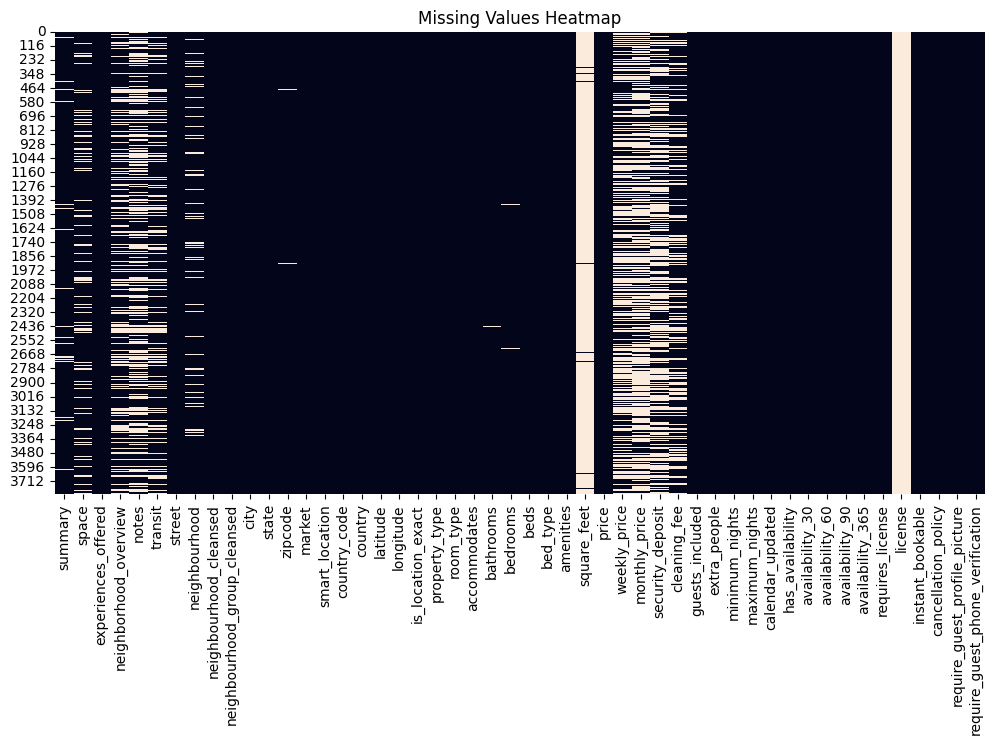

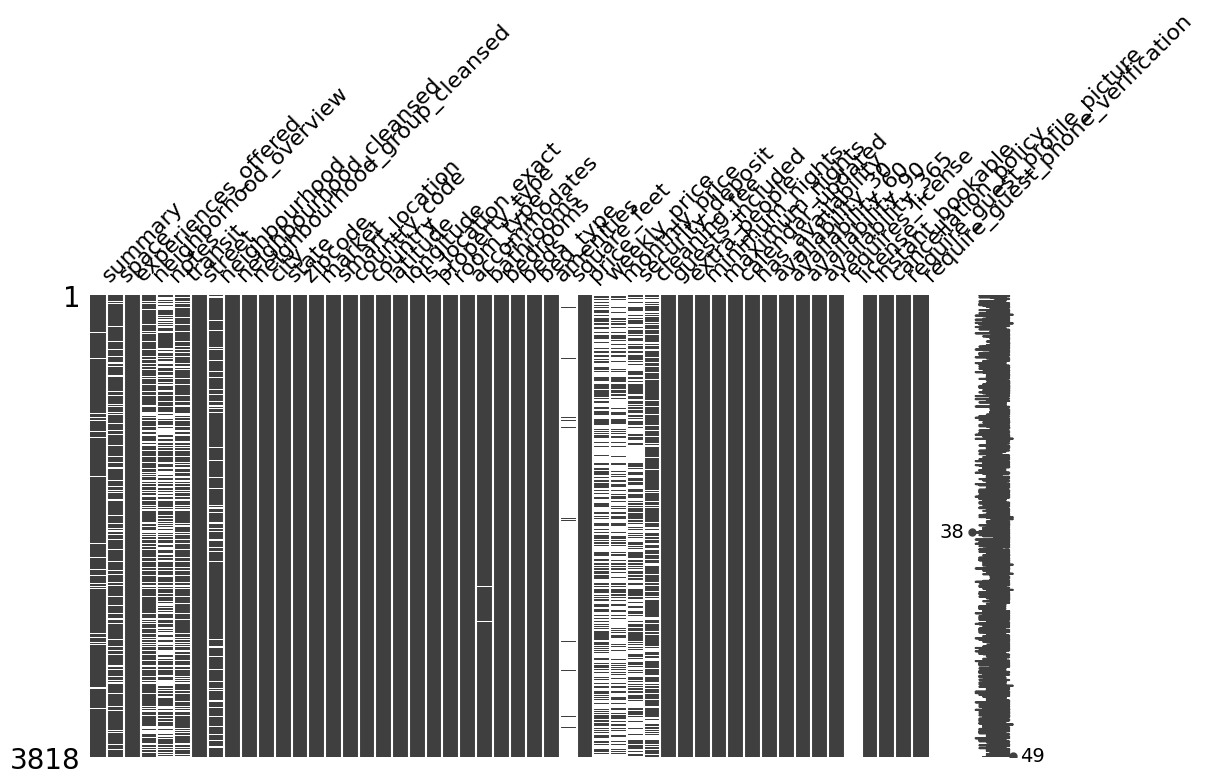

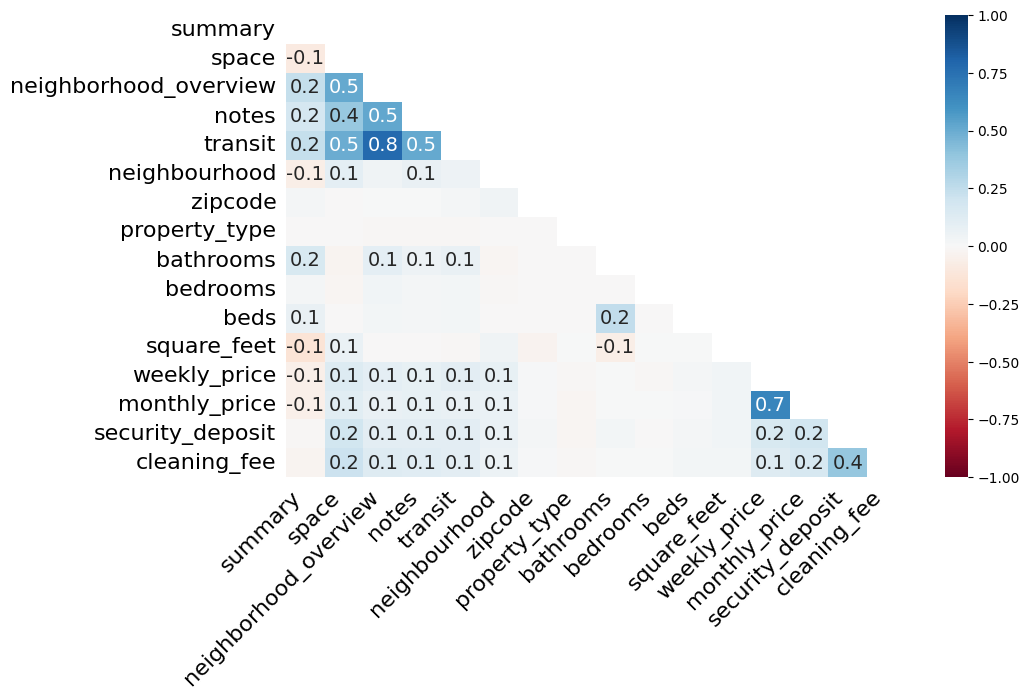


Dropped columns (too many missing values): ['notes', 'square_feet', 'weekly_price', 'monthly_price', 'security_deposit', 'license']
Numeric columns imputed with median: ['latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365']
Categorical columns imputed with mode: ['summary', 'space', 'experiences_offered', 'neighborhood_overview', 'transit', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'is_location_exact', 'property_type', 'room_type', 'bed_type', 'amenities', 'calendar_updated', 'has_availability', 'requires_license', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification']

Shape after missing-value treatment: (3818, 44

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np

# ---- 5. Missing value count ----
missing_summary = df.isnull().sum().sort_values(ascending=False)
missing_summary = missing_summary[missing_summary > 0]
print("Missing values summary:\n")
print(missing_summary)

# ---- 6. Visualize missing values ----
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

msno.matrix(df, figsize=(12,6))
plt.show()

msno.heatmap(df, figsize=(10,6))
plt.show()

# ---- 7. Strategy to handle missing data ----
# Rule of thumb:
# - If >40% missing, drop the column.
# - If numeric with moderate missing, fill with median.
# - If categorical, fill with mode (most frequent).
# - If very few missing (<5%), can drop rows instead.

n = len(df)
drop_threshold = 0.4  # 40%
drop_cols = []
impute_num = {}
impute_cat = {}

for col in df.columns:
    miss_frac = df[col].isna().sum() / n
    if miss_frac > drop_threshold:
        drop_cols.append(col)
    else:
        if np.issubdtype(df[col].dtype, np.number):
            impute_num[col] = "median"
            df[col] = df[col].fillna(df[col].median())
        else:
            impute_cat[col] = "mode"
            df[col] = df[col].fillna(df[col].mode()[0])

# Drop high-missing columns
df = df.drop(columns=drop_cols, errors="ignore")

print("\nDropped columns (too many missing values):", drop_cols)
print("Numeric columns imputed with median:", list(impute_num.keys()))
print("Categorical columns imputed with mode:", list(impute_cat.keys()))

print("\nShape after missing-value treatment:", df.shape)


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# ---- 8. Standardize/Normalize numerical variables ----
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

scaler_std = StandardScaler()
scaler_minmax = MinMaxScaler()

df_std = df.copy()
df_norm = df.copy()

df_std[num_cols] = scaler_std.fit_transform(df[num_cols])
df_norm[num_cols] = scaler_minmax.fit_transform(df[num_cols])

print("Standardization and Normalization done for numerical columns.")

# ---- 9. Encode categorical variables ----
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()

# Apply Label Encoding (for simplicity, but you could also use pd.get_dummies for One-Hot Encoding)
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

print("Categorical encoding done for:", cat_cols)

# ---- 10. Derived / Engineered Features ----
if 'price' in df.columns and 'accommodates' in df.columns:
    df['price_per_person'] = df['price'] / df['accommodates']

if 'availability_365' in df.columns:
    df['availability_ratio'] = df['availability_365'] / 365

if 'price' in df.columns:
    df['log_price'] = np.log1p(df['price'])   # log(1+price) to avoid log(0)

print("Feature engineering complete. New columns added if source columns available:")
print([c for c in df.columns if c.endswith(('per_person','ratio','log_price'))])

# ---- Final dataset summary ----
print("\nFinal shape after transformations:", df.shape)
df.head()


Standardization and Normalization done for numerical columns.
Categorical encoding done for: ['summary', 'space', 'experiences_offered', 'neighborhood_overview', 'transit', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'is_location_exact', 'property_type', 'room_type', 'bed_type', 'amenities', 'calendar_updated', 'has_availability', 'requires_license', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification']
Feature engineering complete. New columns added if source columns available:
['price_per_person', 'availability_ratio', 'log_price']

Final shape after transformations: (3818, 47)


summary  space  experiences_offered  neighborhood_overview  transit  \
0     2931   1076                    0                   2190      540   
1      669    348                    0                   1390      530   
2     1772   1389                    0                   2105      138   
3      197     61                    0                   2190      540   
4      819    537                    0                   2234     1655   

   street  neighbourhood  neighbourhood_cleansed  \
0     798             59                      81   
1     528             59                      81   
2    1385             59                      81   
3     540             59                      81   
4      69             59                      81   

   neighbourhood_group_cleansed  city  ...  availability_90  availability_365  \
0                            12     2  ...               71               346   
1                            12     2  ...               16               291   
2                            12     2  ...               17               220   
3                            12     2  ...                0               143   
4                            12     2  ...               90               365   

   requires_license  instant_bookable  cancellation_policy  \
0                 0                 0                    1   
1                 0                 0                    2   
2                 0                 0                    2   
3                 0                 0                    0   
4                 0                 0                    2   

   require_guest_profile_picture  require_guest_phone_verification  \
0                              0                                 0   
1                              1                                 1   
2                              0                                 0   
3                              0                                 0   
4                              0                                 0   

   price_per_person  availability_ratio  log_price  
0         21.250000            0.947945   4.454347  
1         37.500000            0.797260   5.017280  
2         88.636364            0.602740   6.883463  
3         33.333333            0.391781   4.615121  
4         75.000000            1.000000   6.111467  

[5 rows x 47 columns]

Numerical columns: ['summary', 'space', 'experiences_offered', 'neighborhood_overview', 'transit', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'requires_license', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification', 'price_per_person', 'availability_ratio', 'log_price']

--- Summary Statistics with Skewness & Kurtosis ---


count         mean          std  \
summary                           3818.0  1794.351755  1013.604938   
space                             3818.0  1324.902829   988.388032   
experiences_offered               3818.0     0.000000     0.000000   
neighborhood_overview             3818.0  1504.687533   745.273149   
transit                           3818.0  1083.370875   715.973956   
street                            3818.0   683.103719   422.014961   
neighbourhood                     3818.0    31.822944    24.346455   
neighbourhood_cleansed            3818.0    37.548455    26.511927   
neighbourhood_group_cleansed      3818.0     7.482190     4.791631   
city                              3818.0     2.002619     0.102336   
state                             3818.0     0.000262     0.016184   
zipcode                           3818.0     9.711105     6.960428   
market                            3818.0     0.000000     0.000000   
smart_location                    3818.0     3.000000     0.088654   
country_code                      3818.0     0.000000     0.000000   
country                           3818.0     0.000000     0.000000   
latitude                          3818.0    47.628961     0.043052   
longitude                         3818.0  -122.333103     0.031745   
is_location_exact                 3818.0     0.893662     0.308311   
property_type                     3818.0     4.925354     4.620118   
room_type                         3818.0     0.365113     0.541453   
accommodates                      3818.0     3.349398     1.977599   
bathrooms                         3818.0     1.258381     0.589369   
bedrooms                          3818.0     1.307229     0.882785   
beds                              3818.0     1.735202     1.139393   
bed_type                          3818.0     3.910424     0.475043   
amenities                         3818.0  1680.015191   949.139756   
price                             3818.0   127.976166    90.250022   
cleaning_fee                      3818.0    58.551598    42.047668   
guests_included                   3818.0     1.672603     1.311040   
extra_people                      3818.0    10.667627    17.585922   
minimum_nights                    3818.0     2.369303    16.305902   
maximum_nights                    3818.0   780.447617  1683.589007   
calendar_updated                  3818.0    20.882137     8.657561   
has_availability                  3818.0     0.000000     0.000000   
availability_30                   3818.0    16.786276    12.173637   
availability_60                   3818.0    36.814825    23.337541   
availability_90                   3818.0    58.082504    34.063845   
availability_365                  3818.0   244.772656   126.772526   
requires_license                  3818.0     0.000000     0.000000   
instant_bookable                  3818.0     0.154793     0.361755   
cancellation_policy               3818.0     1.069932     0.817084   
require_guest_profile_picture     3818.0     0.084075     0.277537   
require_guest_phone_verification  3818.0     0.098219     0.297649   
price_per_person                  3818.0    41.266923    20.676221   
availability_ratio                3818.0     0.670610     0.347322   
log_price                         3818.0     4.689942     0.560033   

                                         min         25%          50%  \
summary                             0.000000  904.250000  1835.500000   
space                               0.000000  346.250000  1275.500000   
experiences_offered                 0.000000    0.000000     0.000000   
neighborhood_overview               0.000000  840.250000  1711.500000   
transit                             0.000000  540.000000   838.000000   
street                              0.000000  303.000000   671.000000   
neighbourhood                       0.000000   10.000000    24.000000   
neighbourhood_cleansed              0.000000   12.000000    37.000000   
neighbourhood_gro

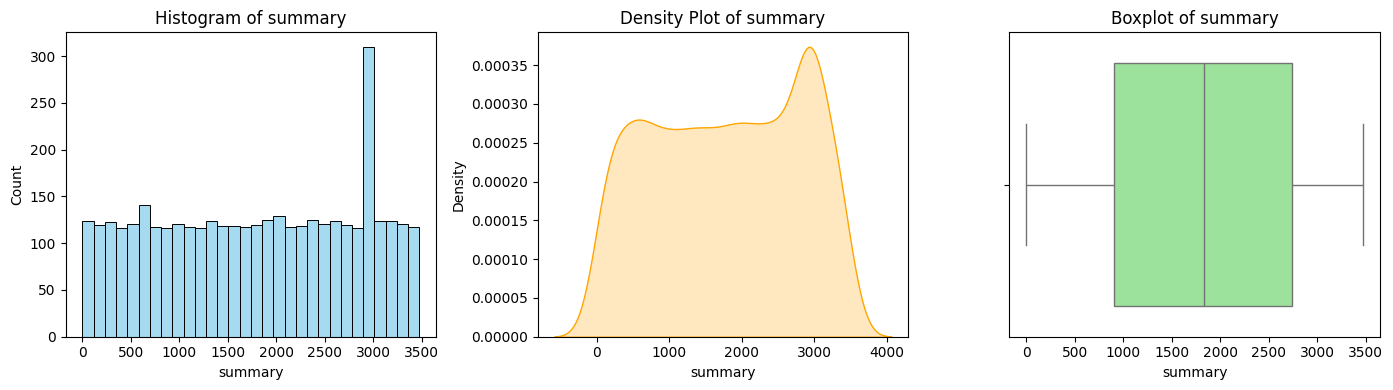

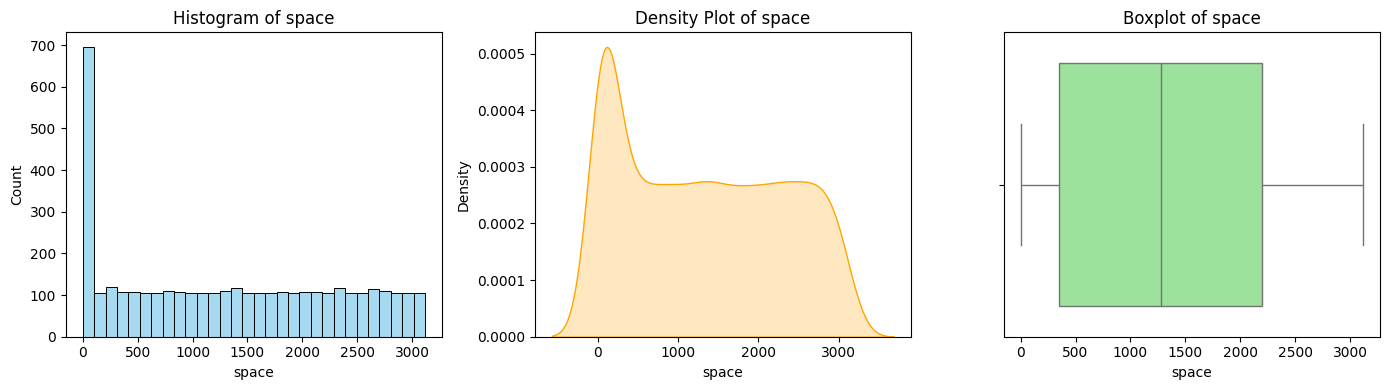

/tmp/ipython-input-58484554.py:30: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[col], fill=True, color="orange")


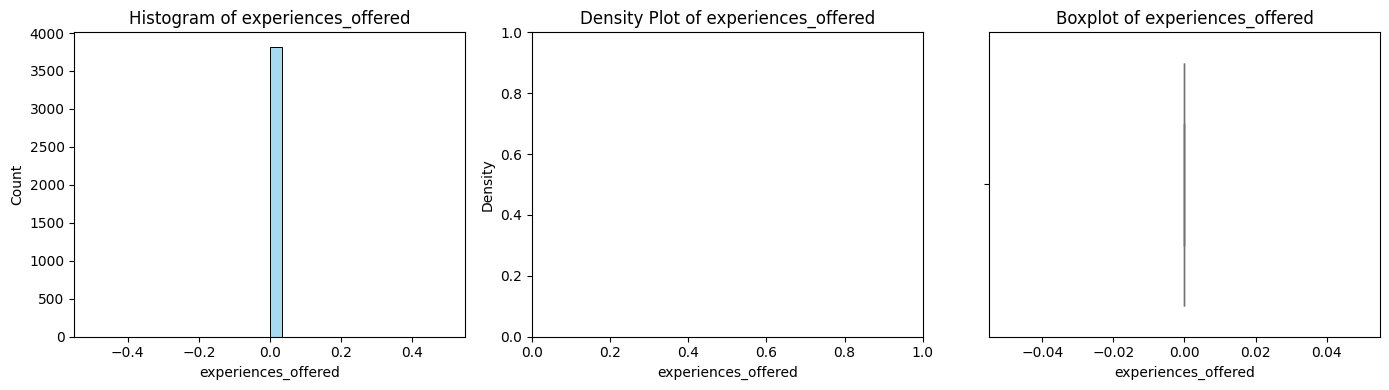

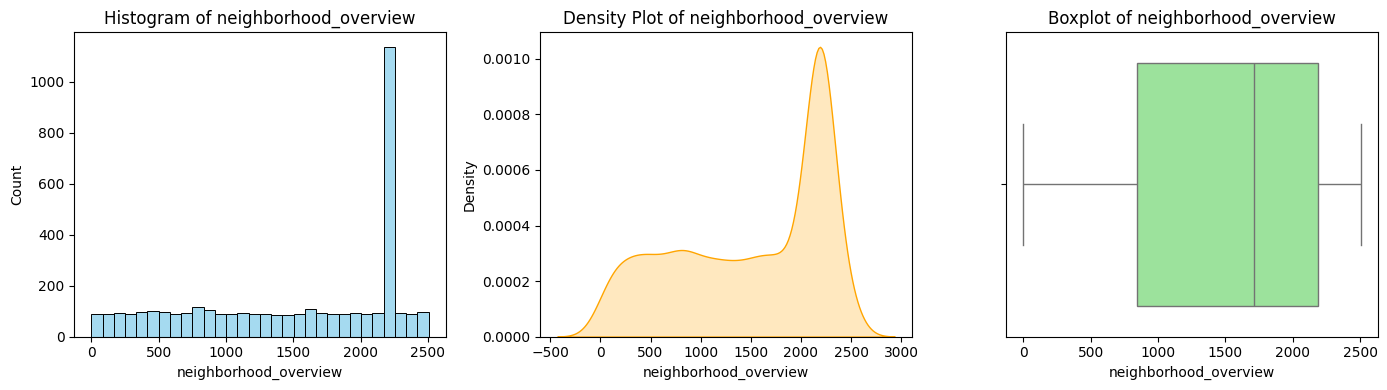

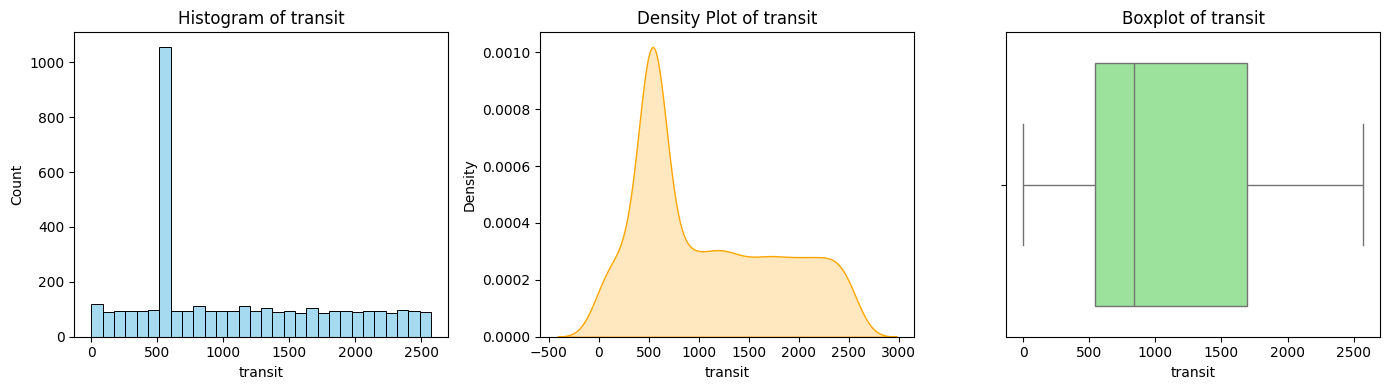

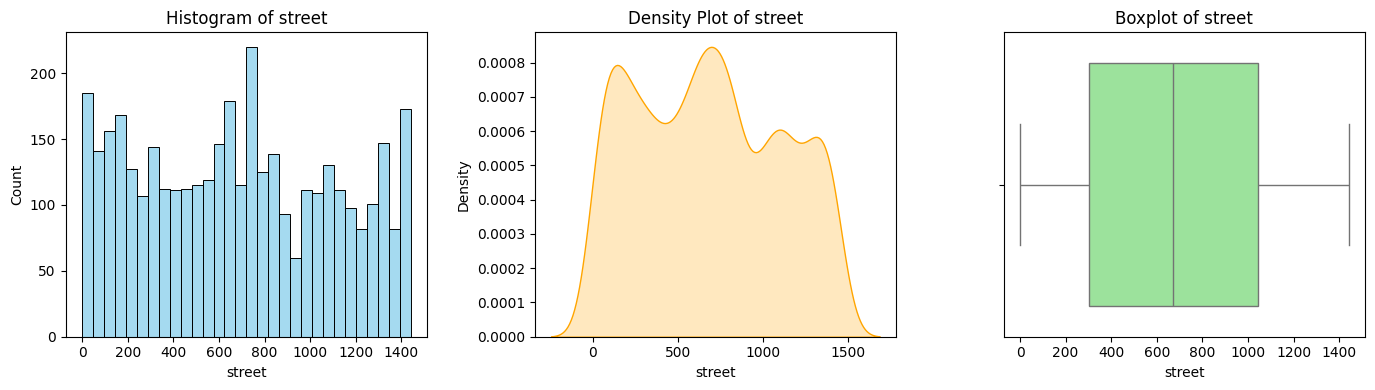

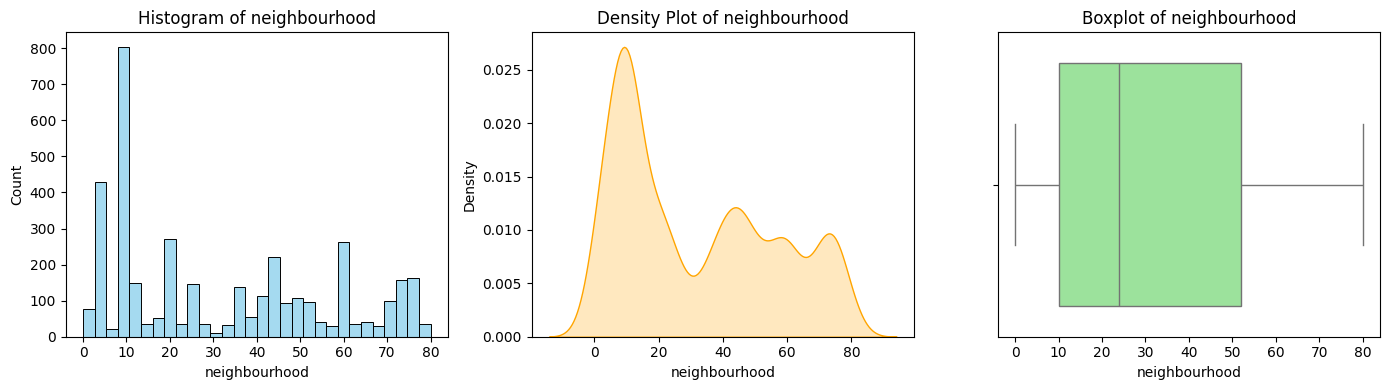

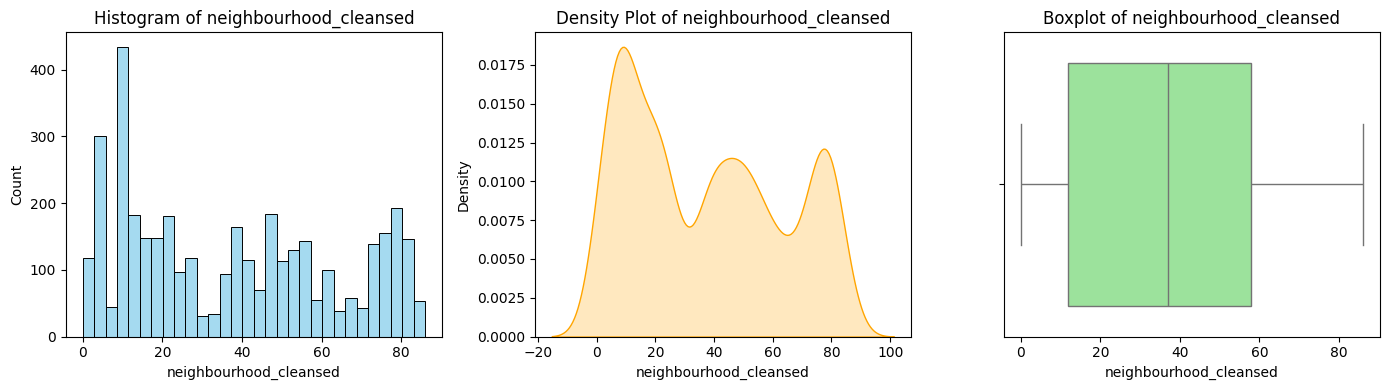

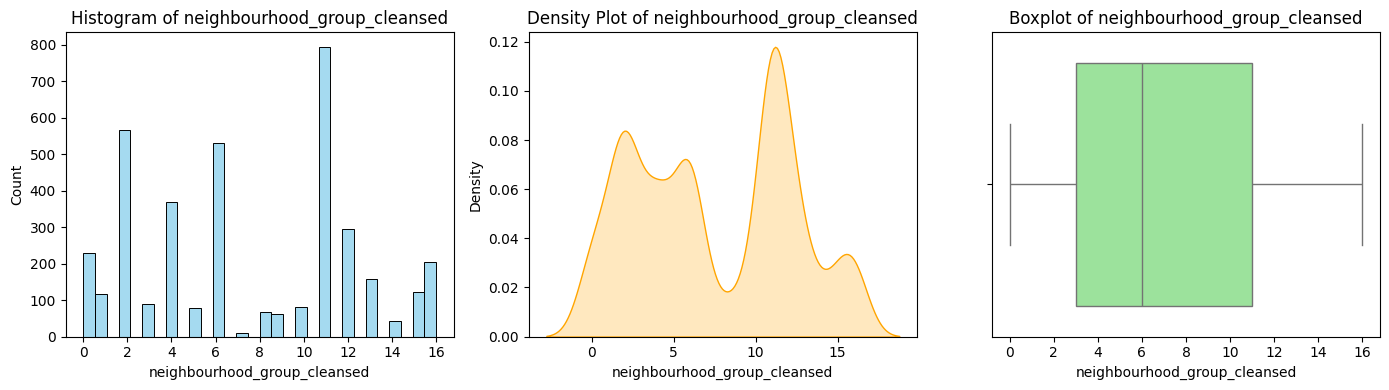

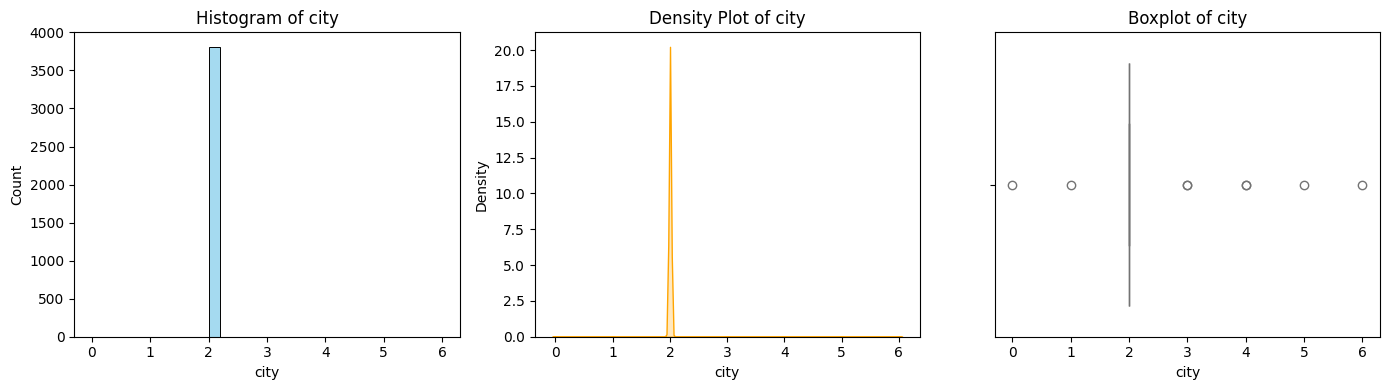

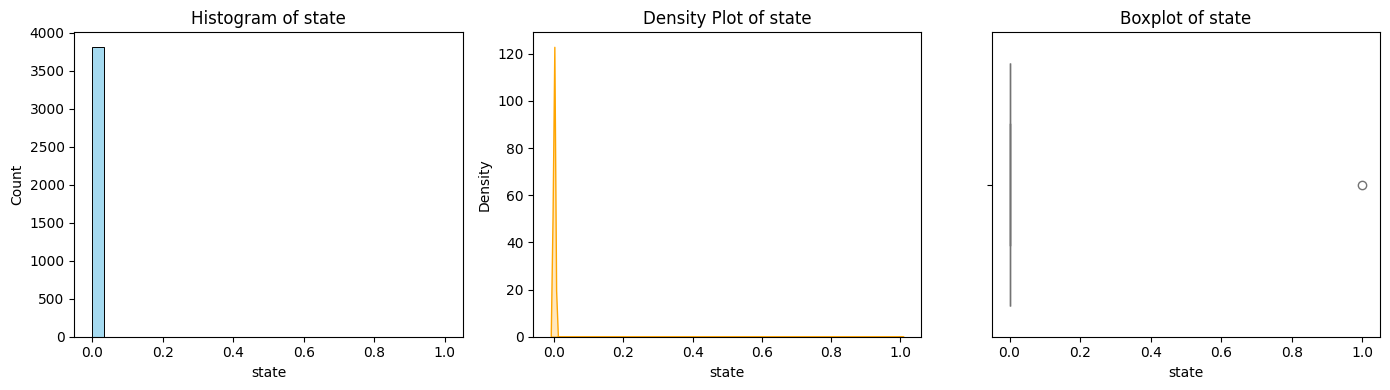

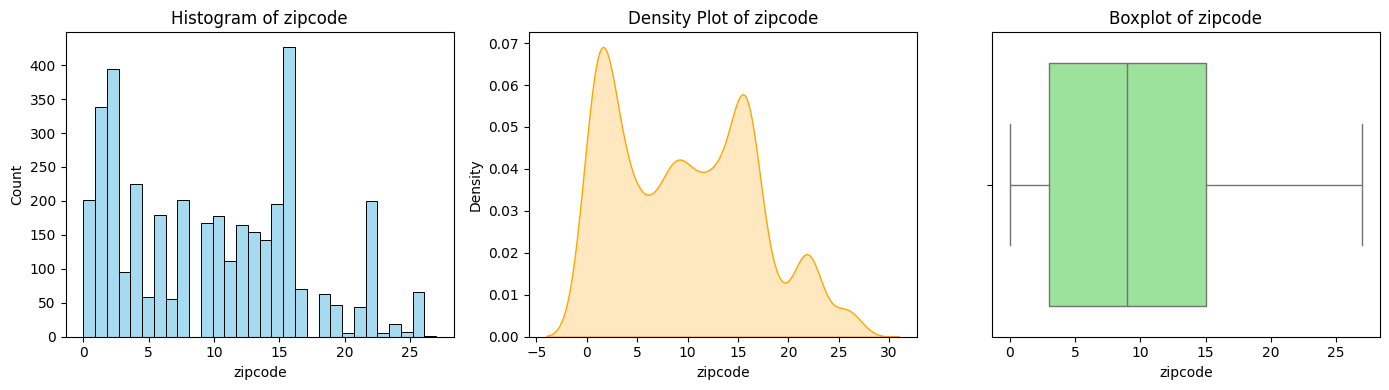

/tmp/ipython-input-58484554.py:30: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[col], fill=True, color="orange")


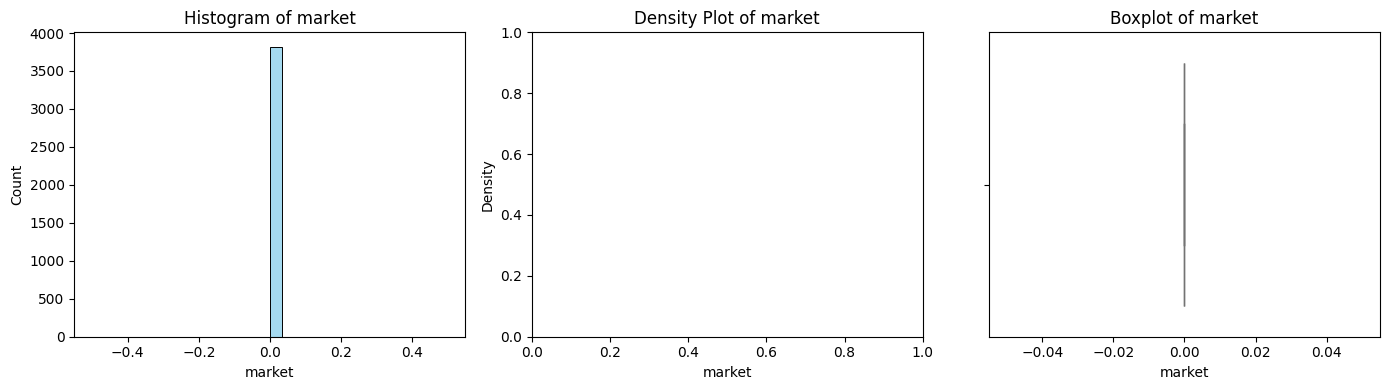

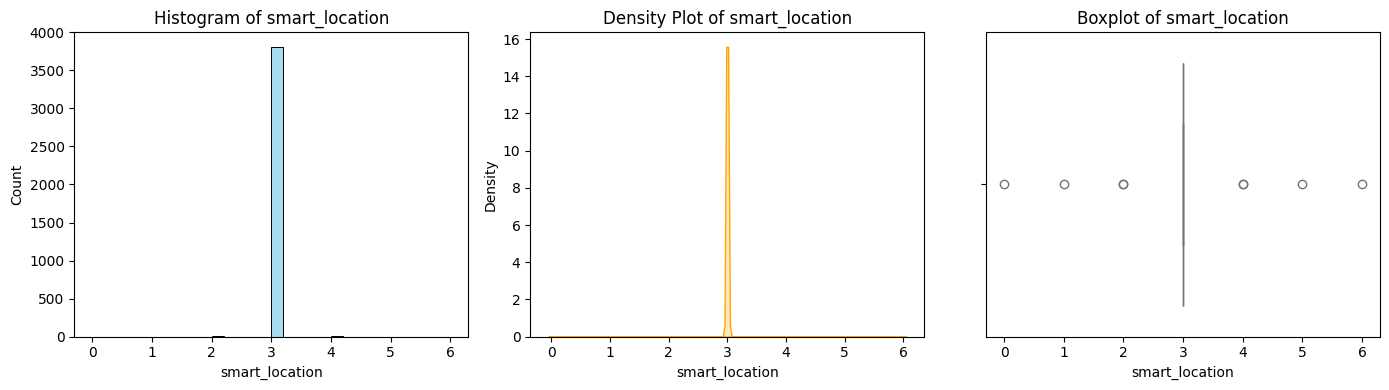

/tmp/ipython-input-58484554.py:30: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[col], fill=True, color="orange")


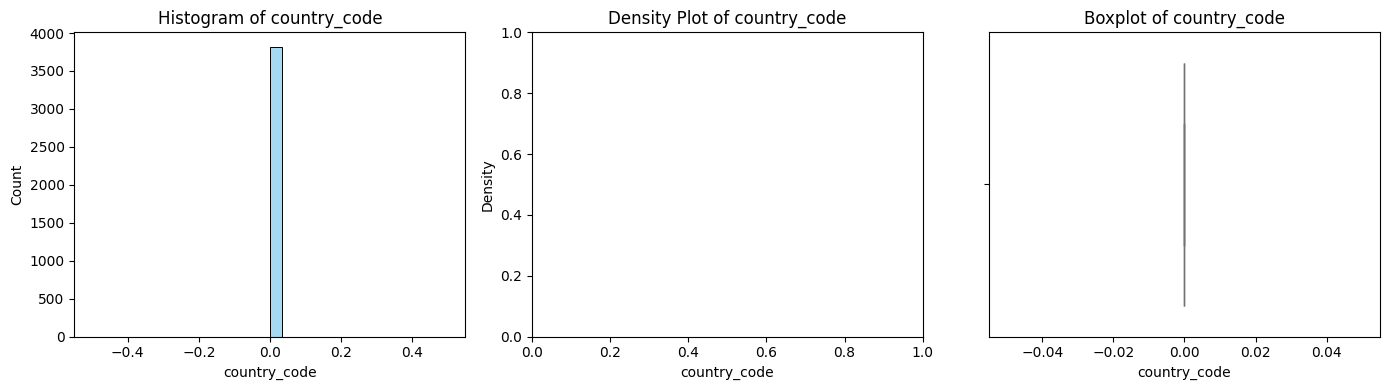

/tmp/ipython-input-58484554.py:30: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[col], fill=True, color="orange")


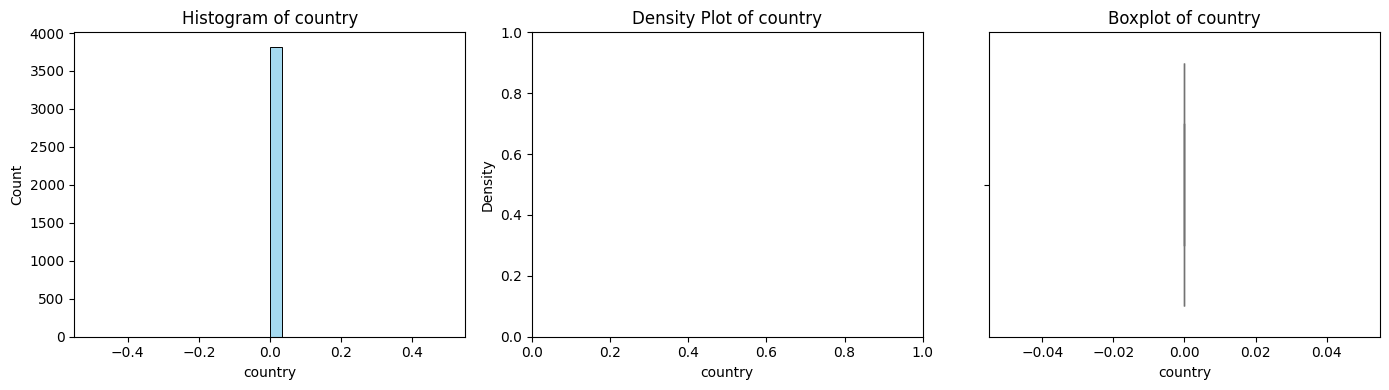

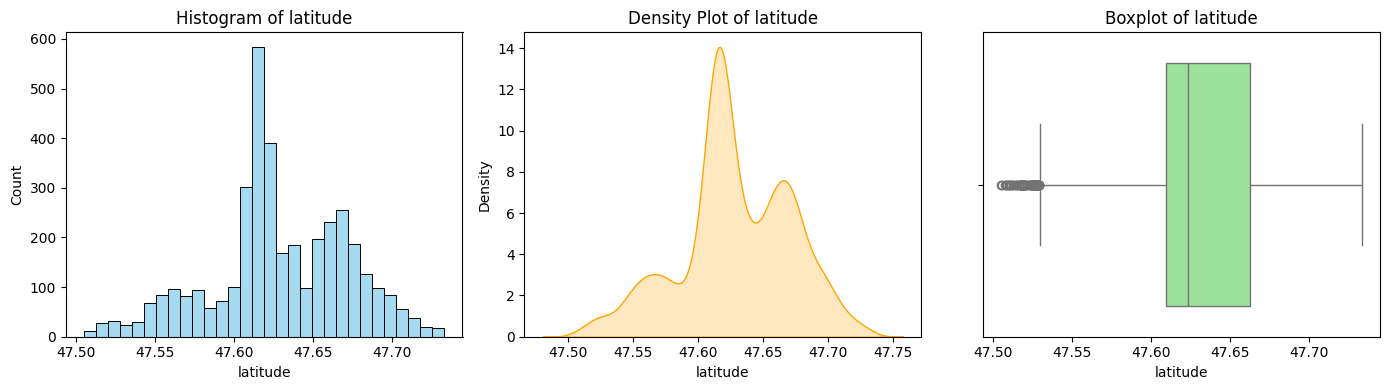

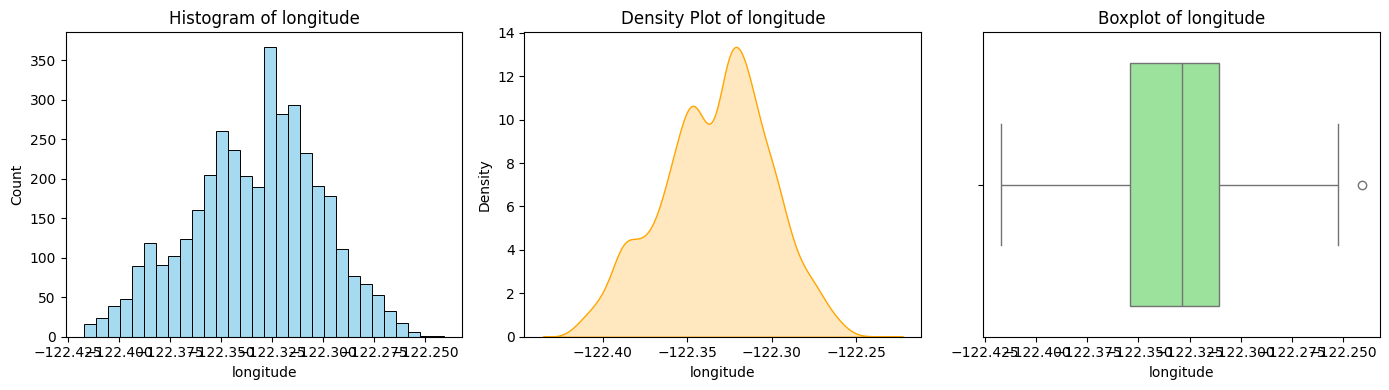

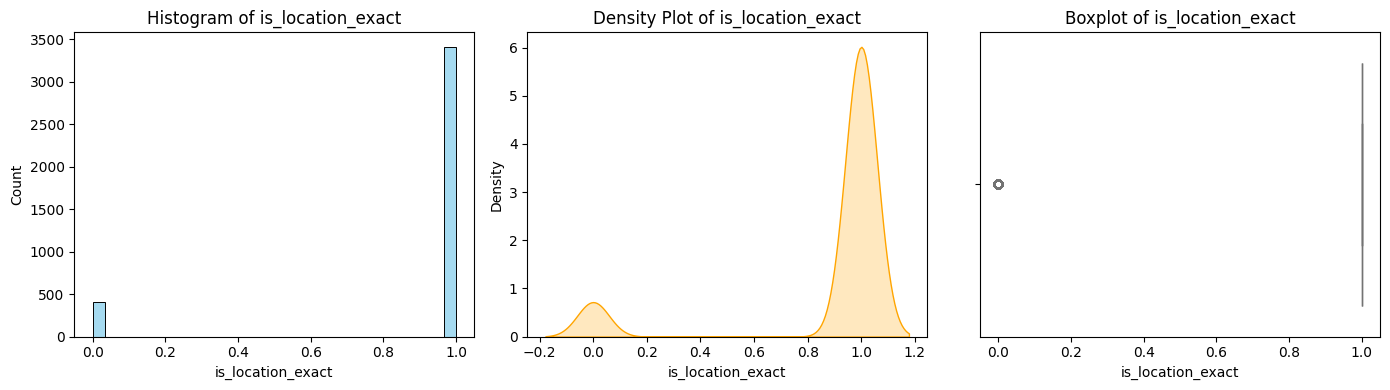

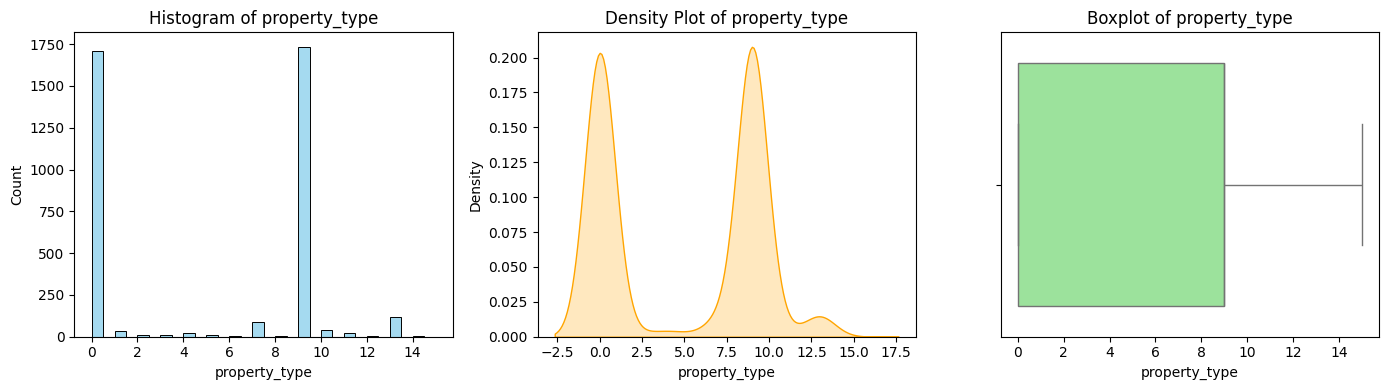

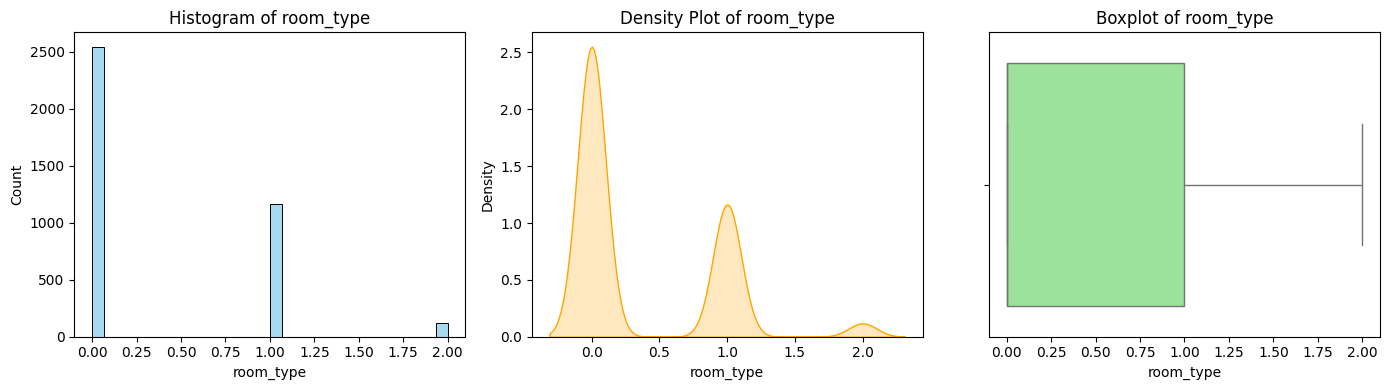

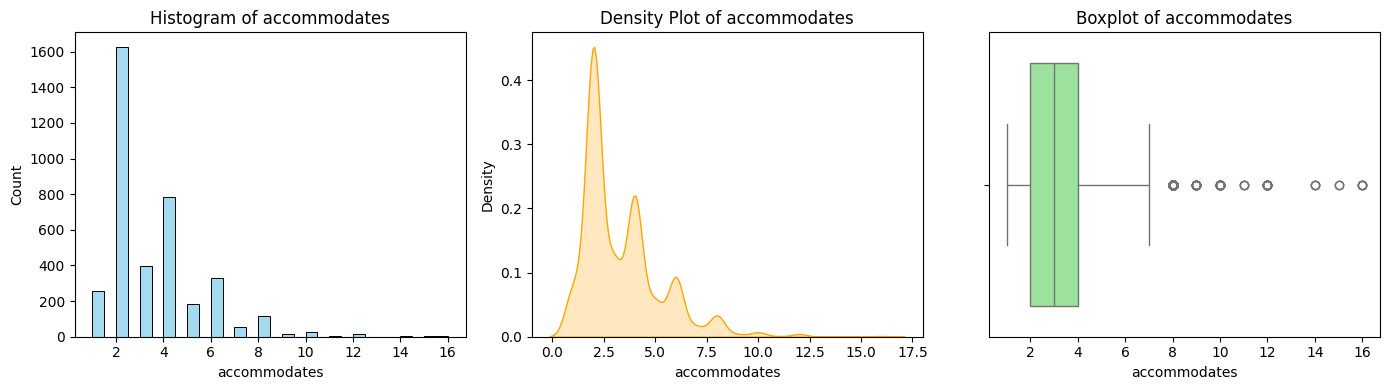

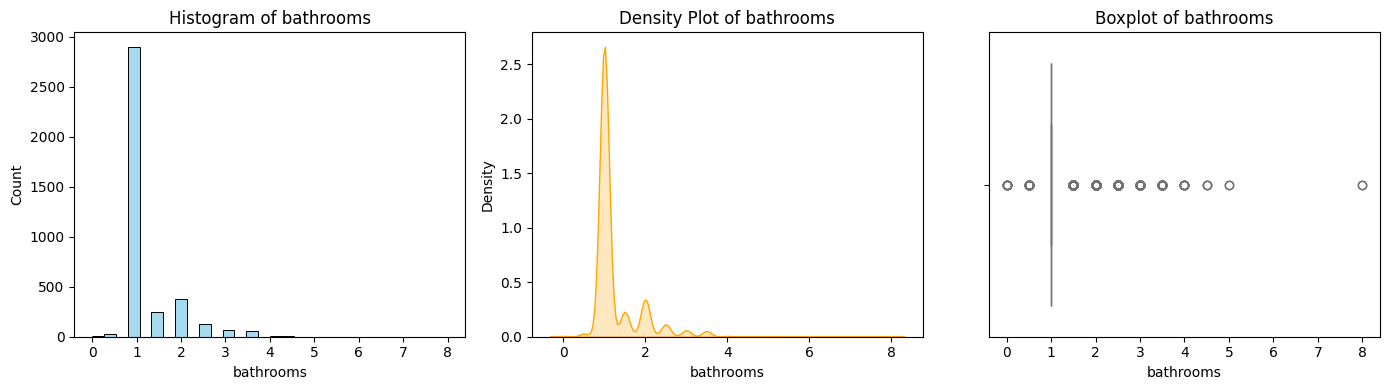

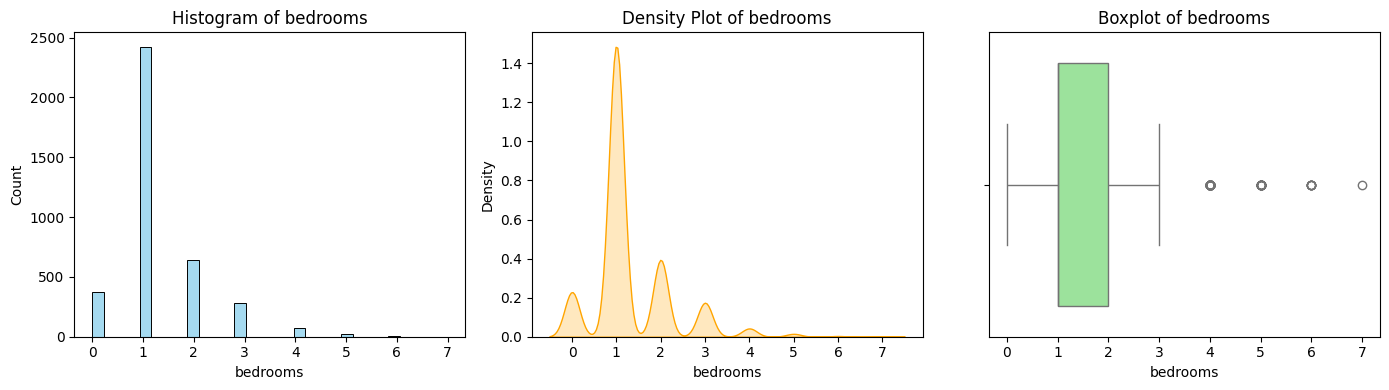

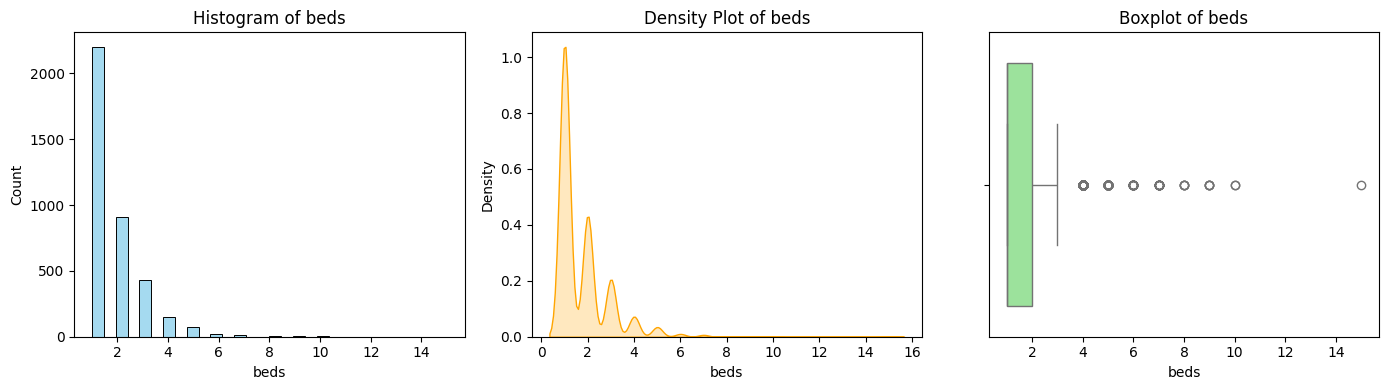

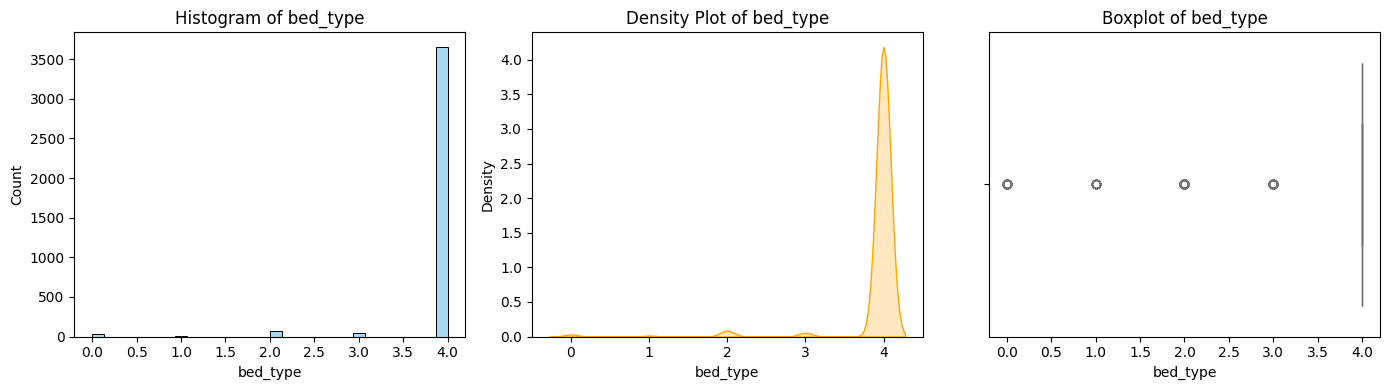

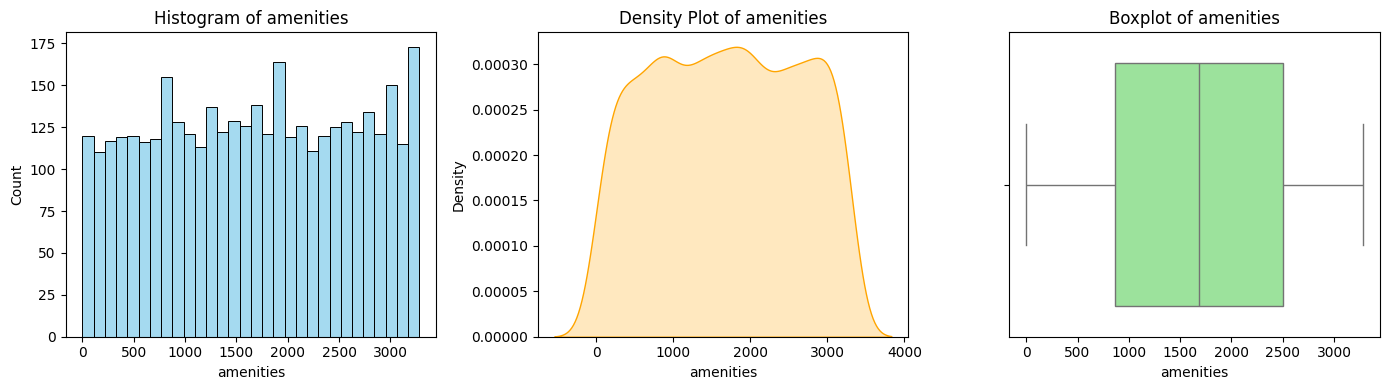

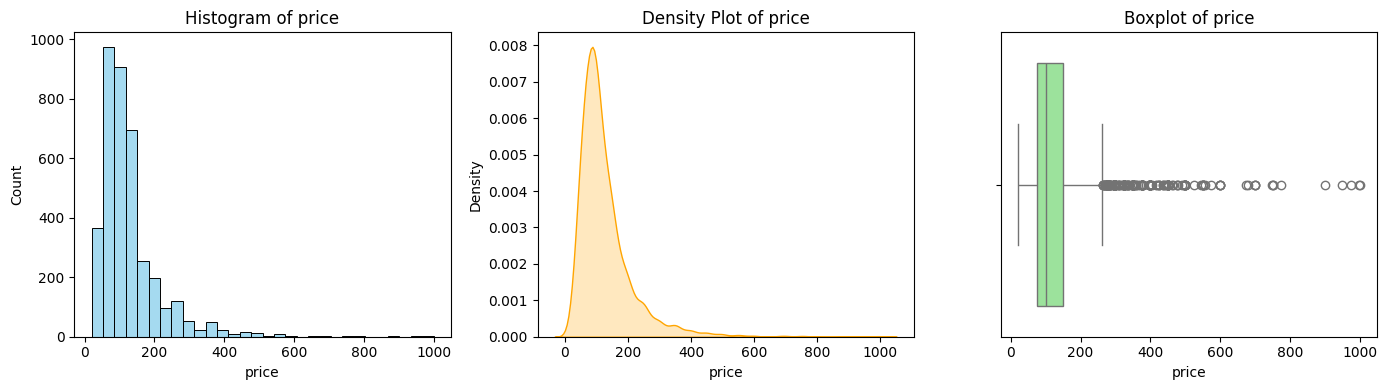

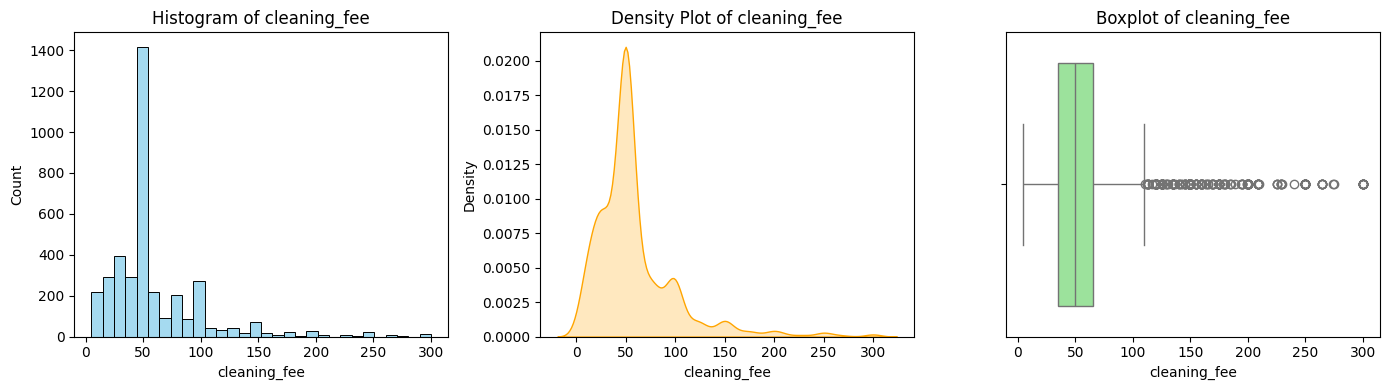

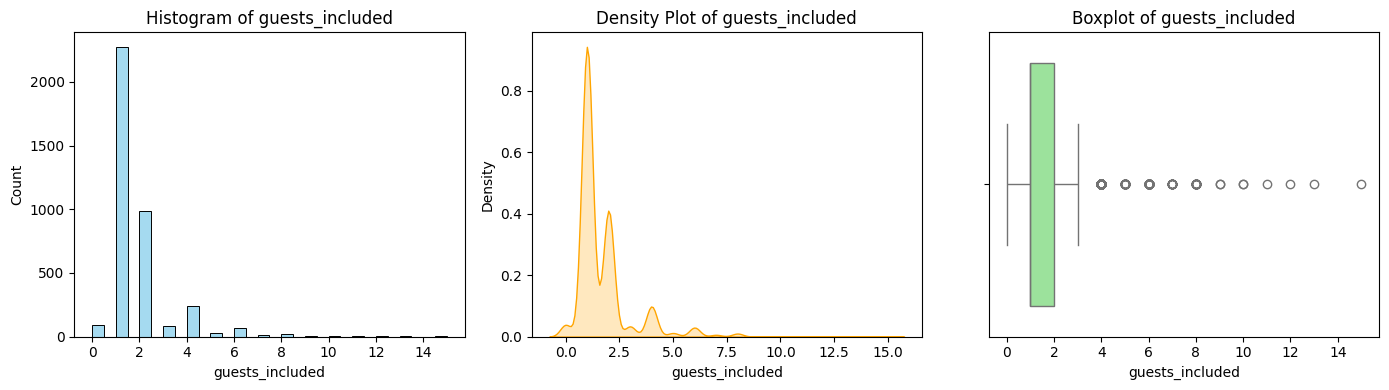

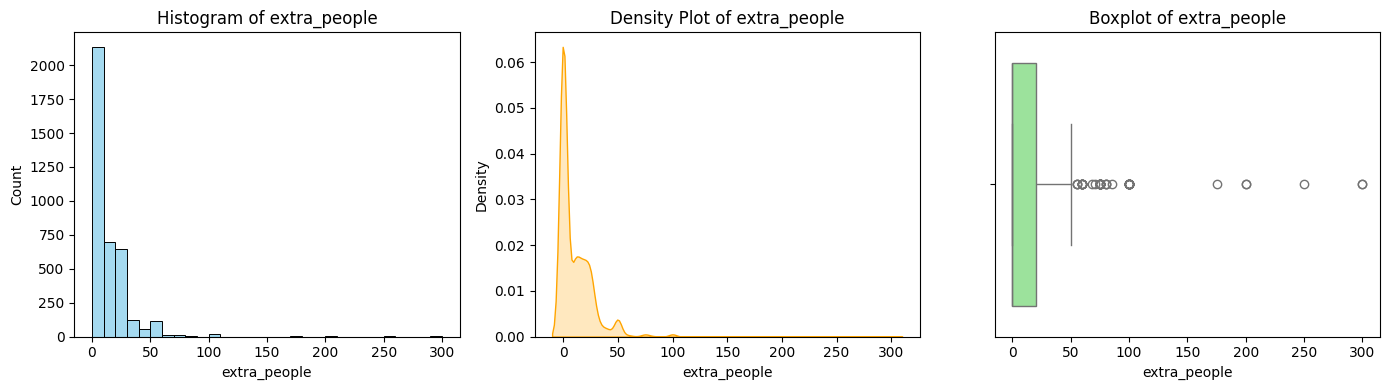

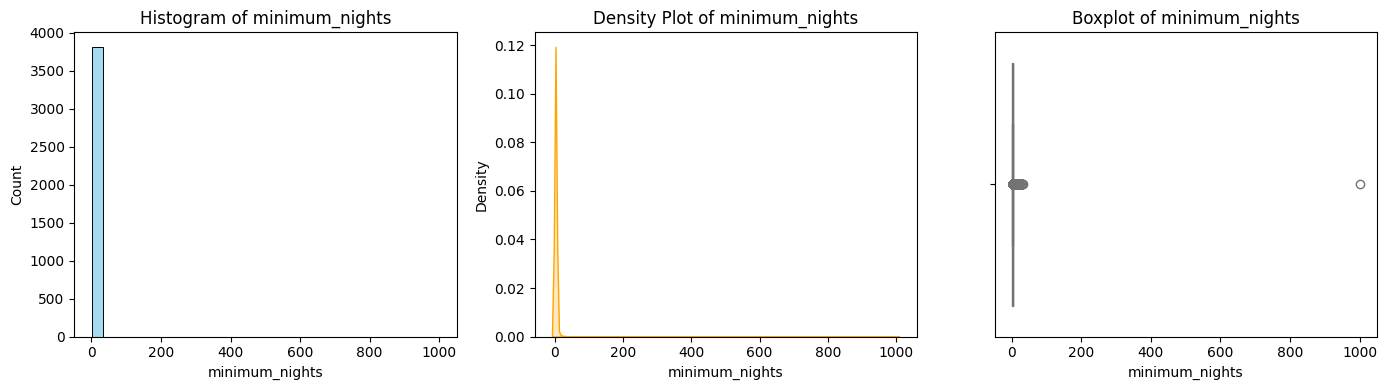

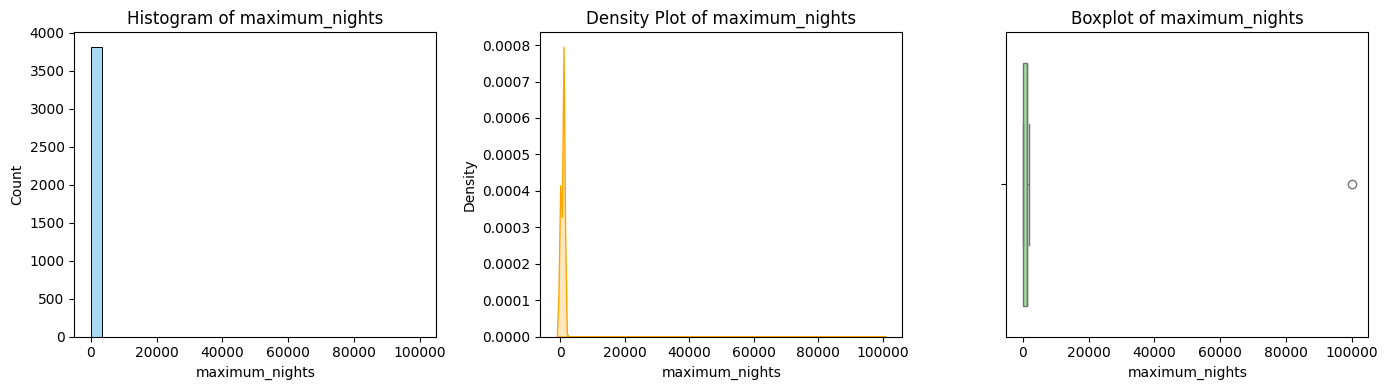

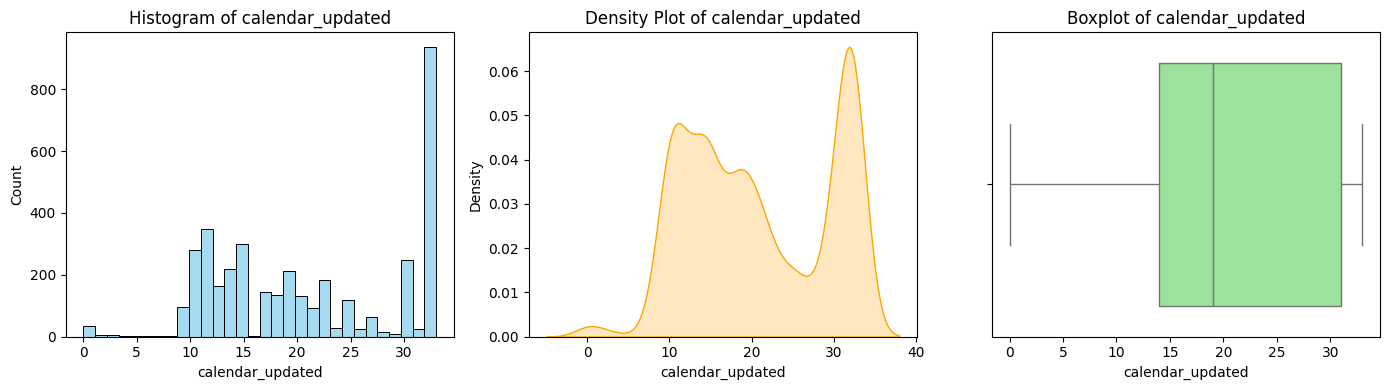

/tmp/ipython-input-58484554.py:30: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[col], fill=True, color="orange")


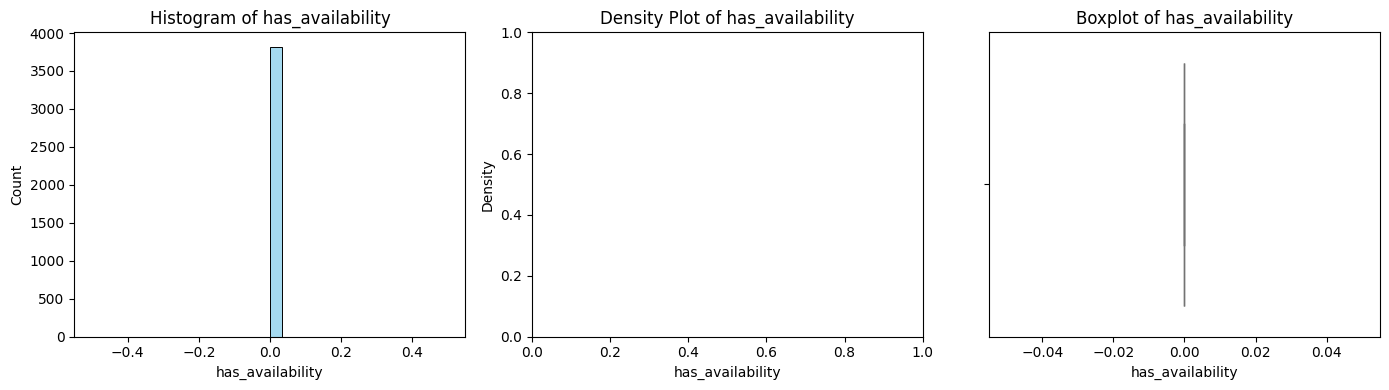

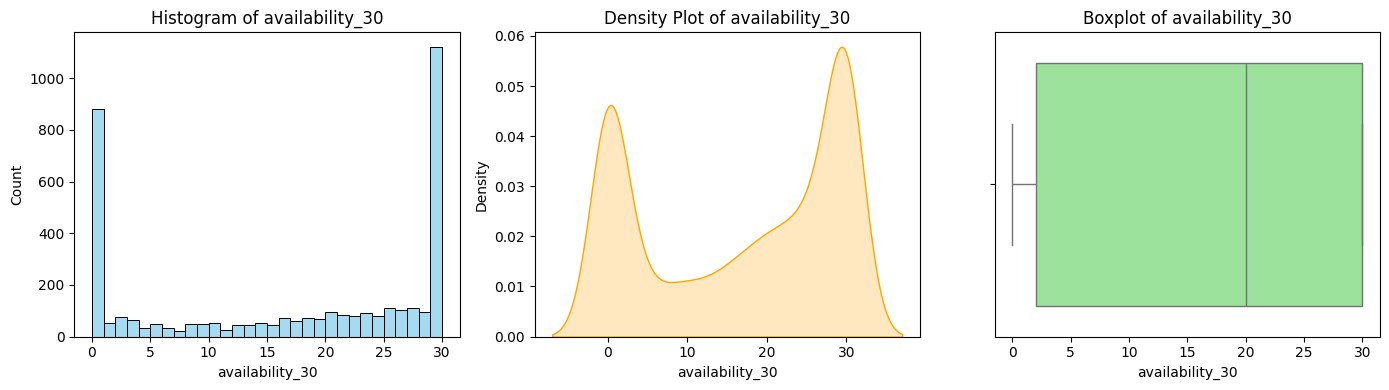

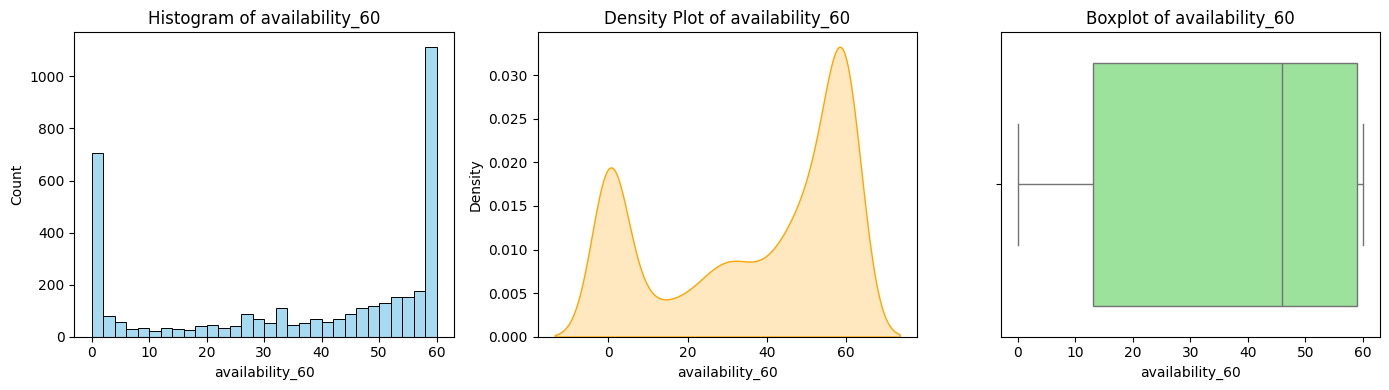

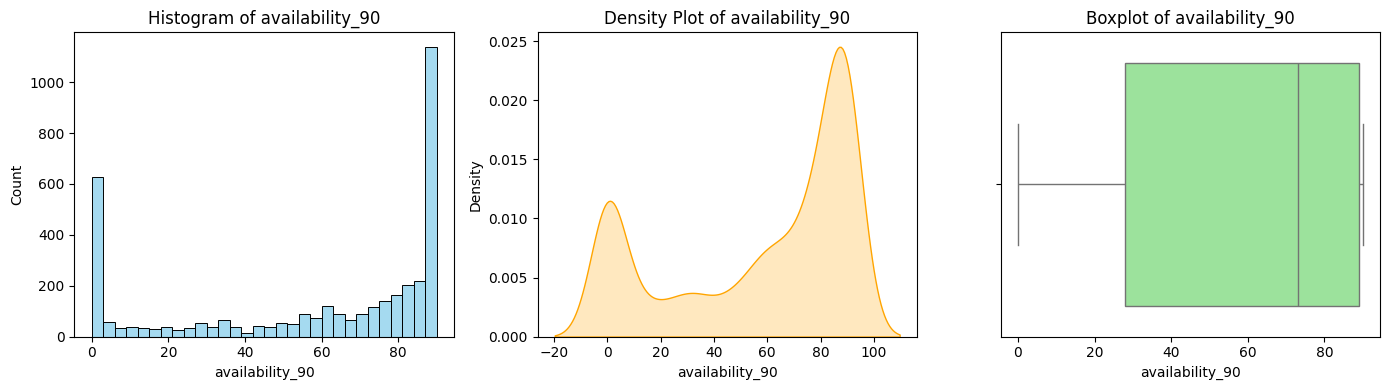

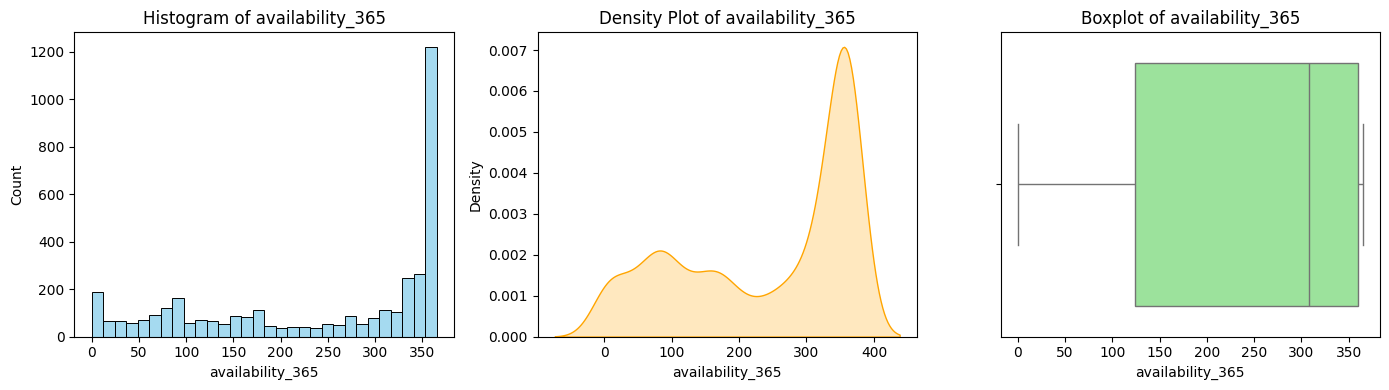

/tmp/ipython-input-58484554.py:30: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[col], fill=True, color="orange")


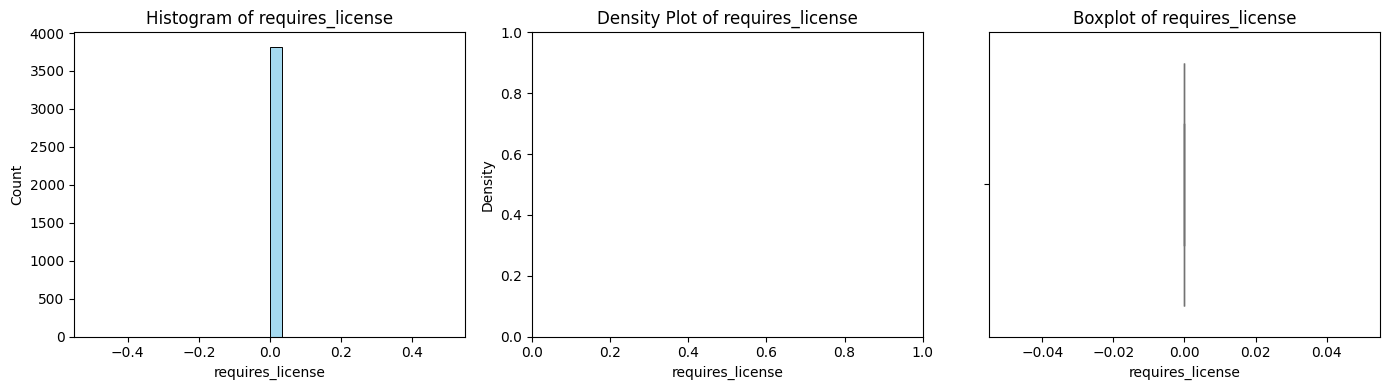

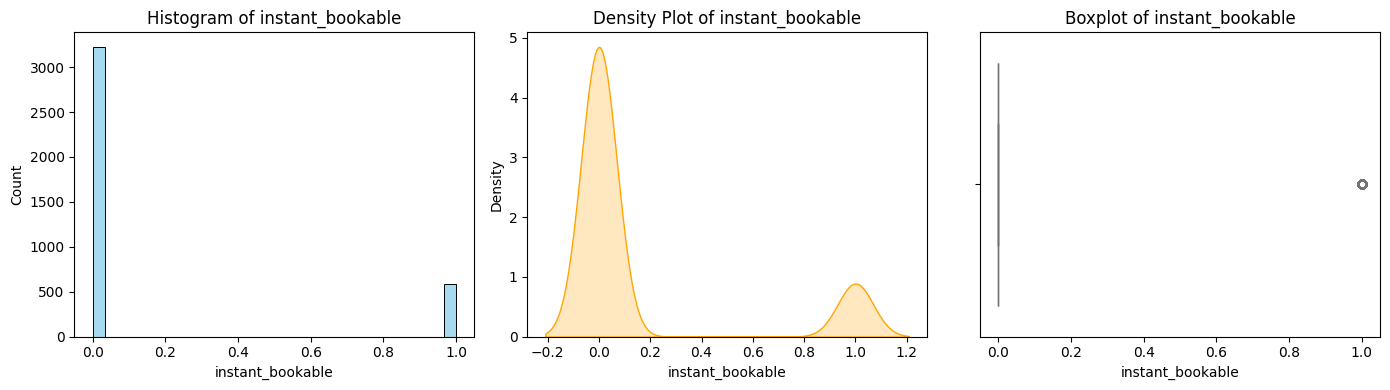

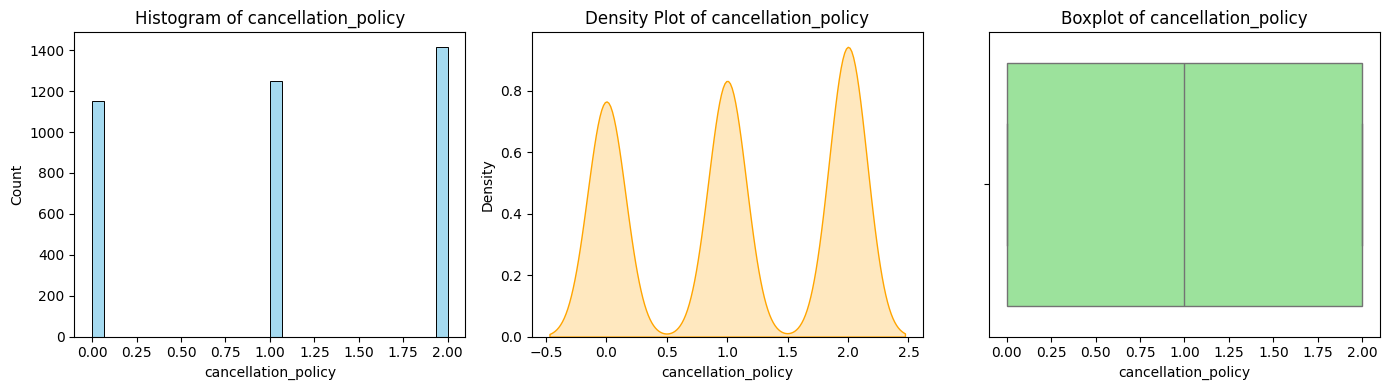

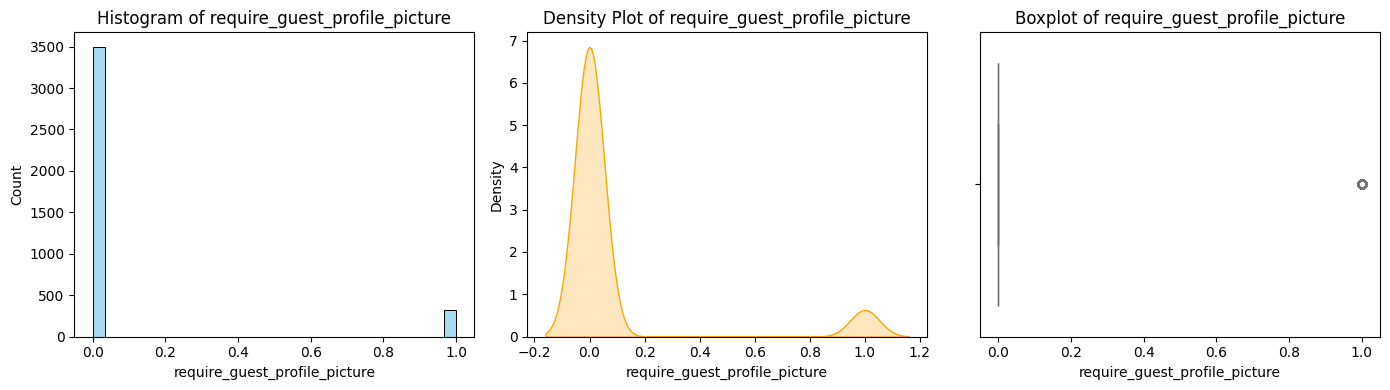

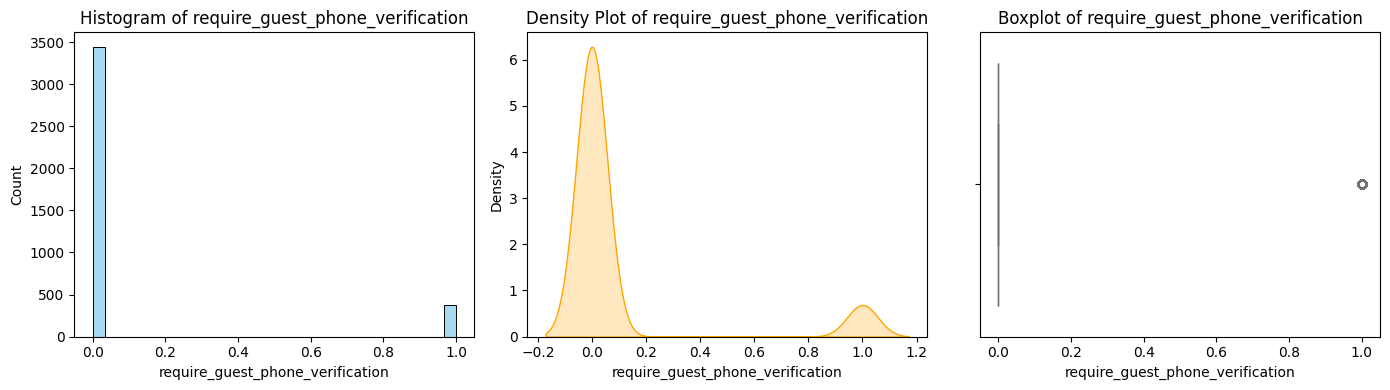

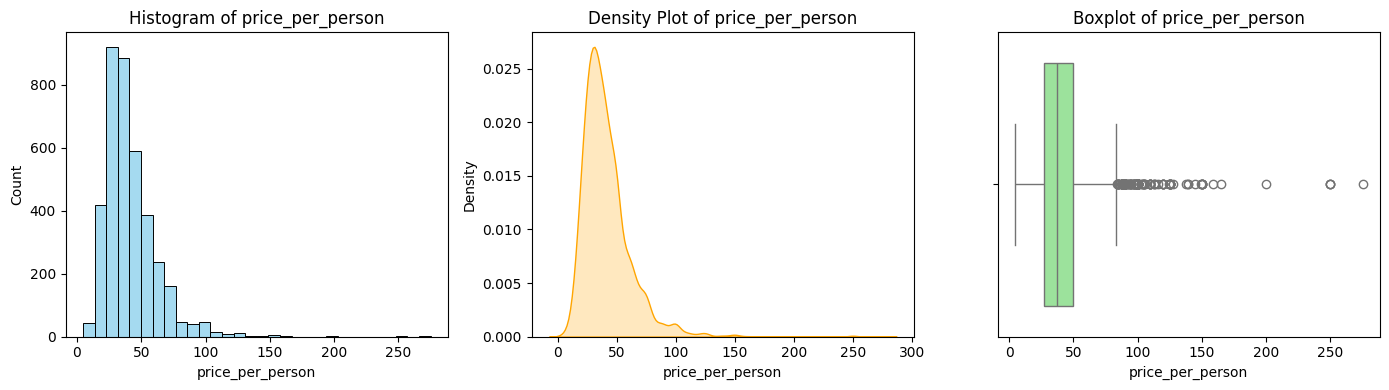

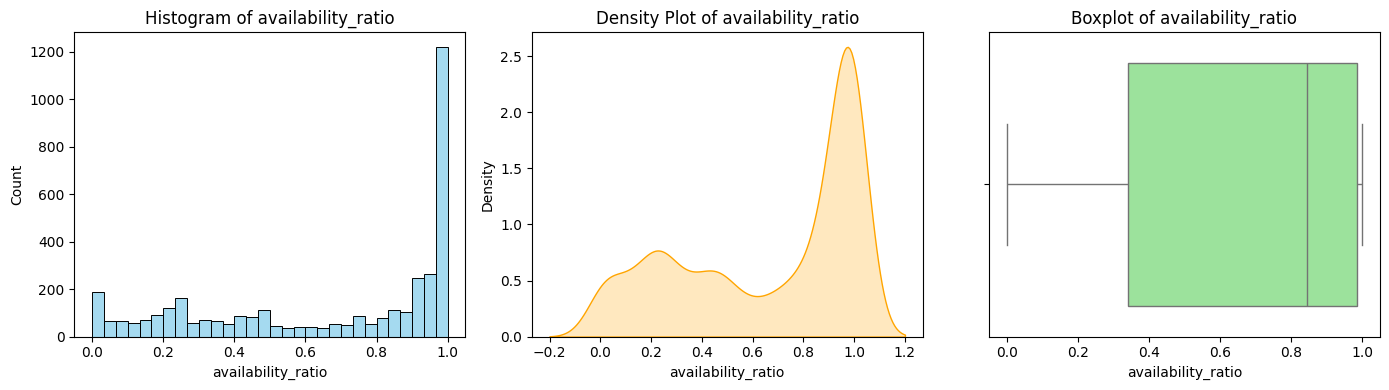

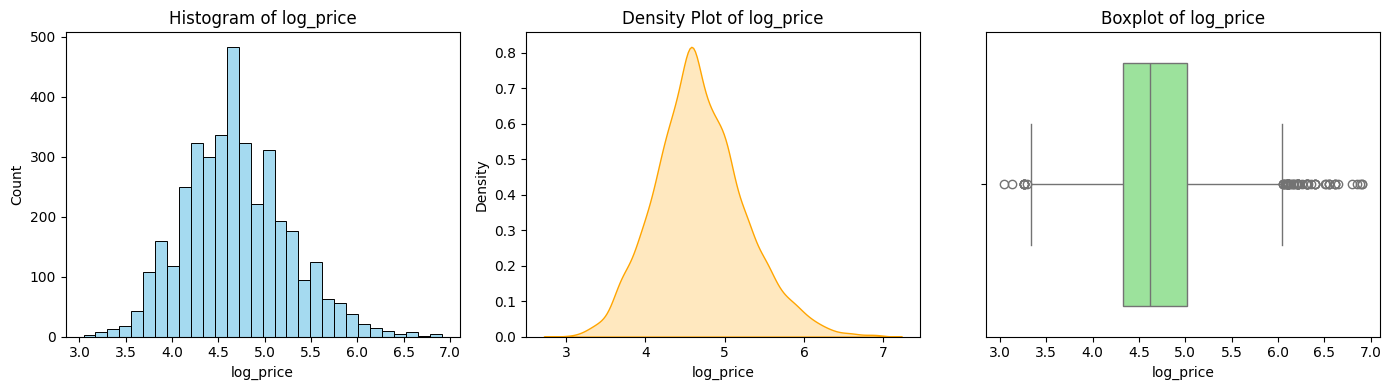

In [ ]:
# ============================
# Q2: Univariate Analysis - Numerical Features
# ============================

import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
print("Numerical columns:", num_cols)

# ---- 1. Summary statistics ----
summary_stats = df[num_cols].describe().T
summary_stats["skewness"] = df[num_cols].skew()
summary_stats["kurtosis"] = df[num_cols].kurtosis()
print("\n--- Summary Statistics with Skewness & Kurtosis ---")
display(summary_stats)

# ---- 2. Visualization: histograms, density plots, boxplots ----
for col in num_cols:
    plt.figure(figsize=(14,4))

    # Histogram
    plt.subplot(1,3,1)
    sns.histplot(df[col], kde=False, bins=30, color="skyblue")
    plt.title(f"Histogram of {col}")

    # Density plot
    plt.subplot(1,3,2)
    sns.kdeplot(df[col], fill=True, color="orange")
    plt.title(f"Density Plot of {col}")

    # Boxplot
    plt.subplot(1,3,3)
    sns.boxplot(x=df[col], color="lightgreen")
    plt.title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()


Detected categorical-like columns: ['state', 'country', 'is_location_exact', 'bedrooms', 'require_guest_phone_verification', 'guests_included', 'country_code', 'room_type', 'market', 'neighbourhood_group_cleansed', 'city', 'bed_type', 'smart_location', 'experiences_offered', 'instant_bookable', 'require_guest_profile_picture', 'property_type', 'has_availability', 'beds', 'requires_license', 'accommodates', 'bathrooms', 'cancellation_policy']


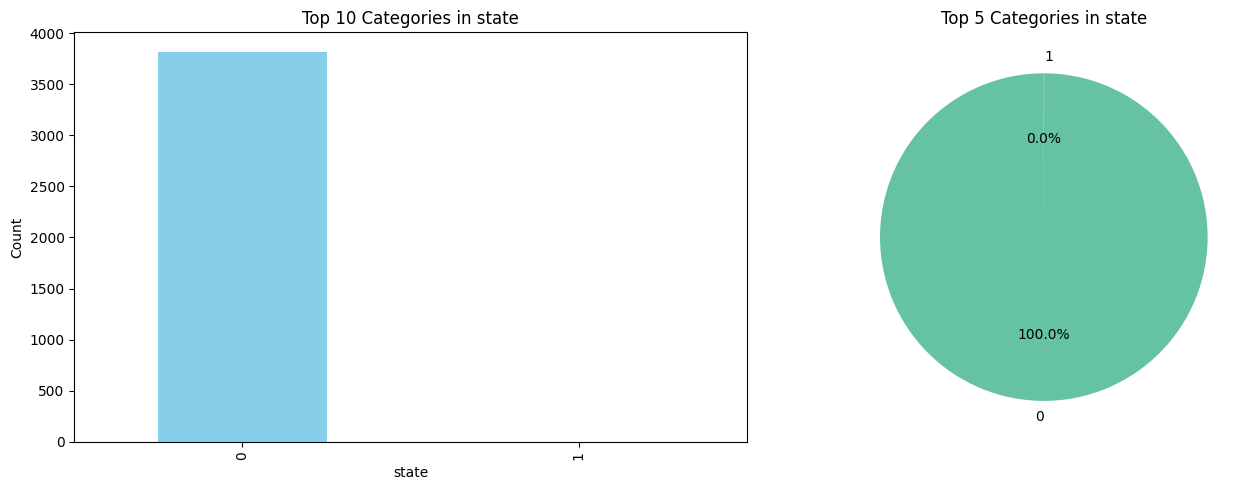

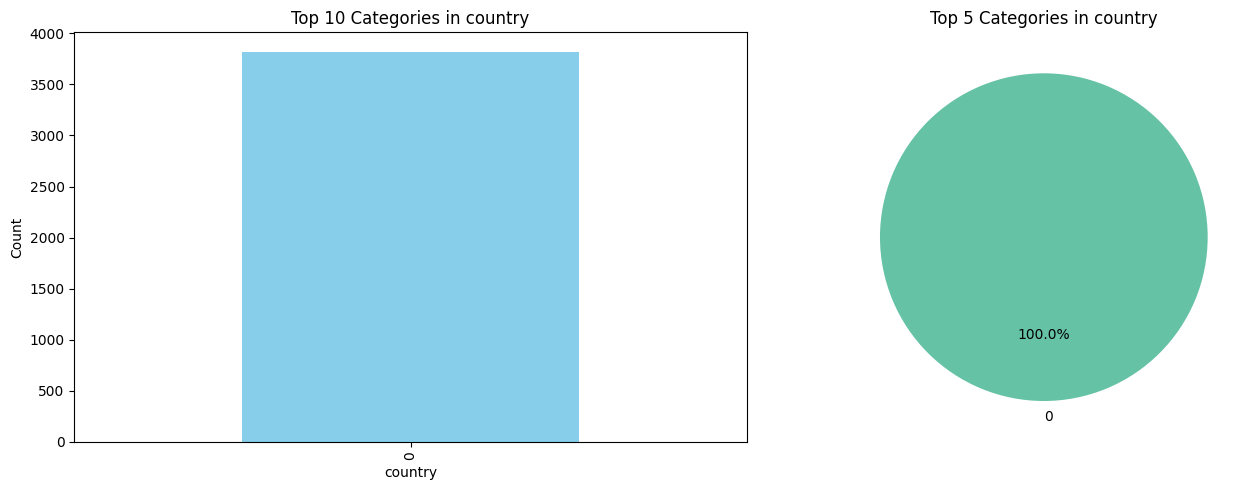

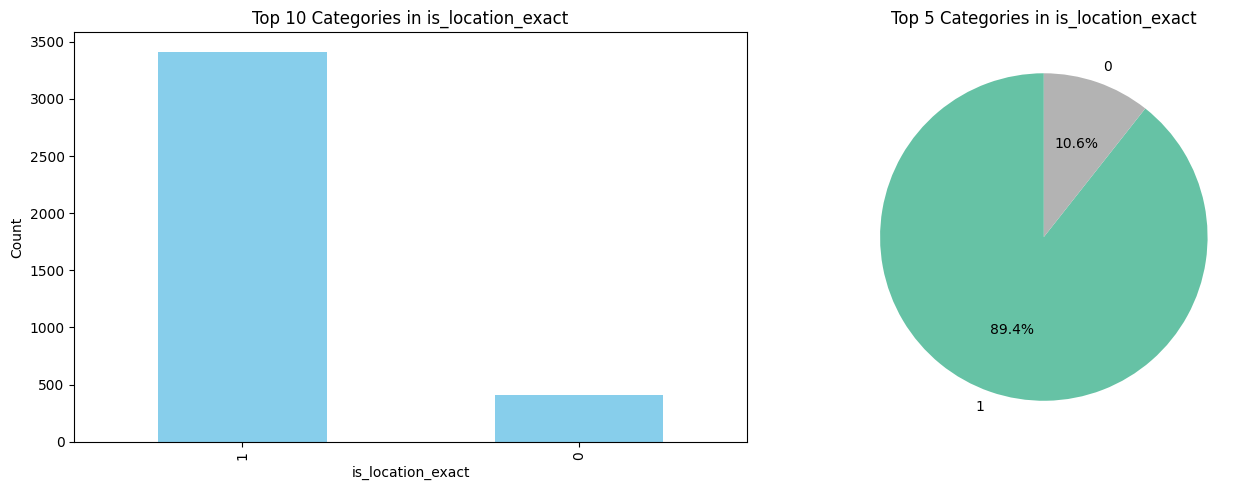

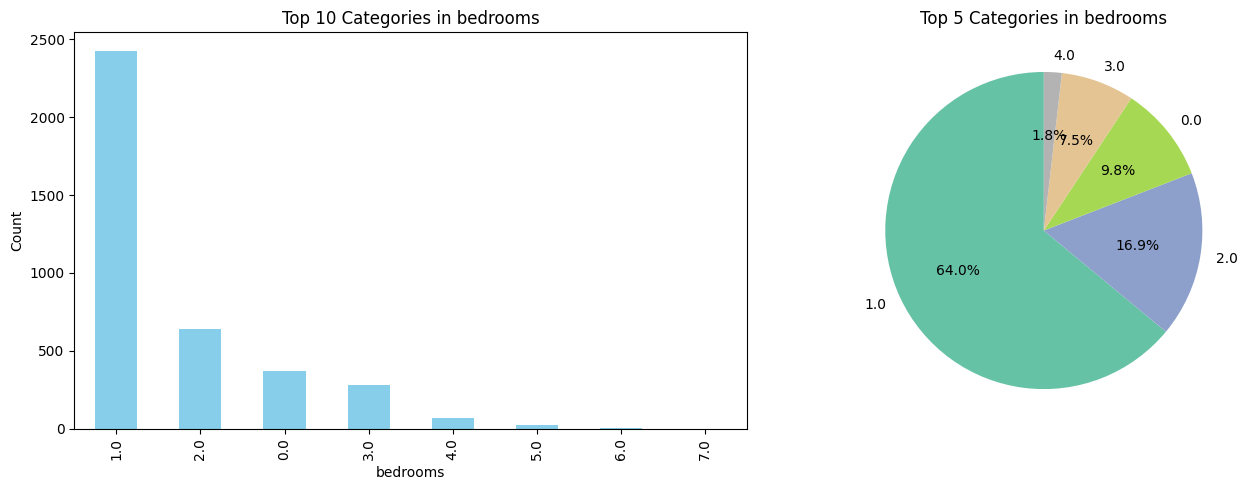

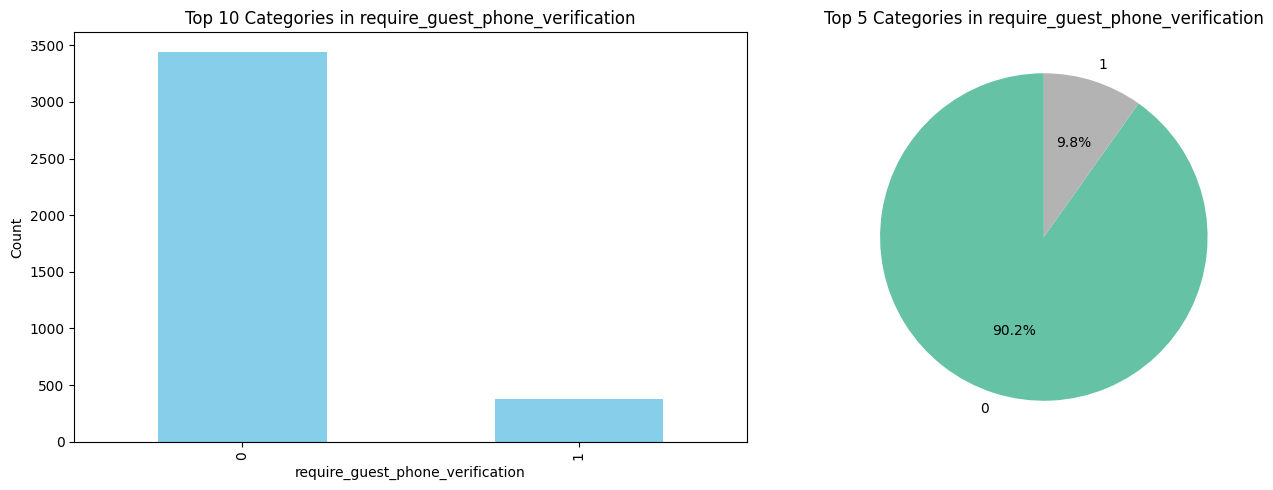

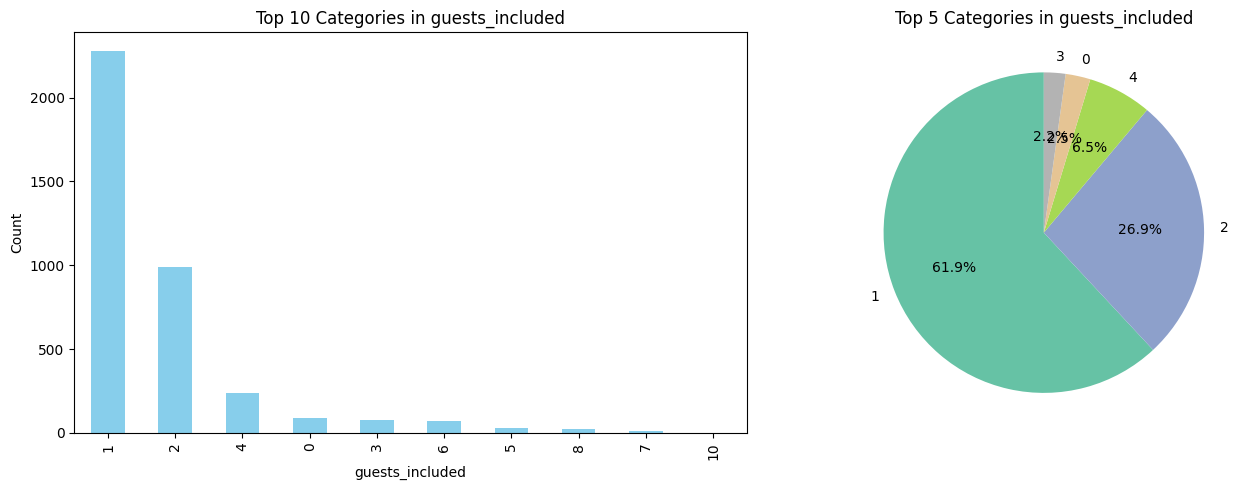

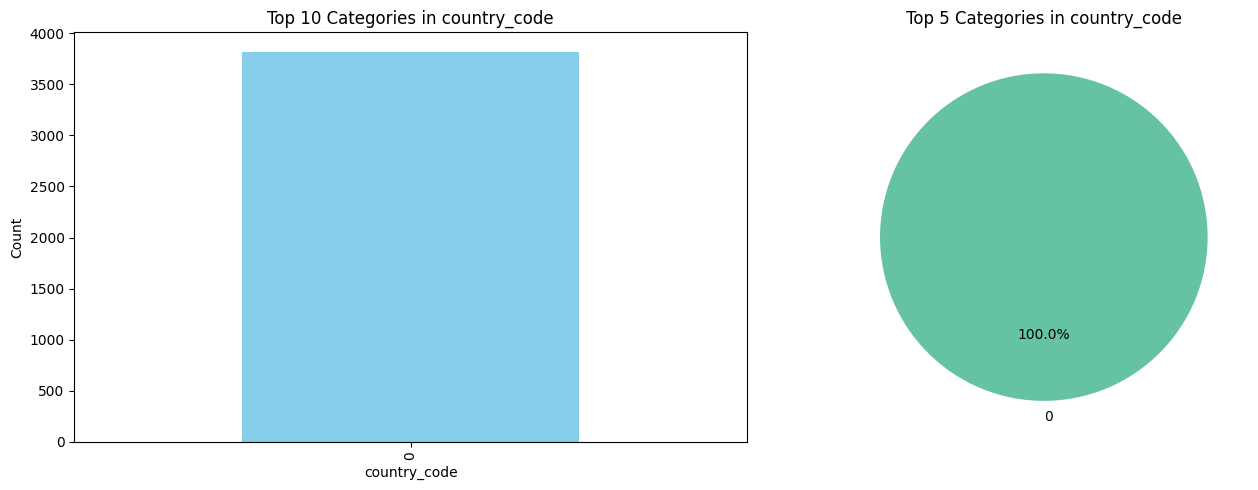

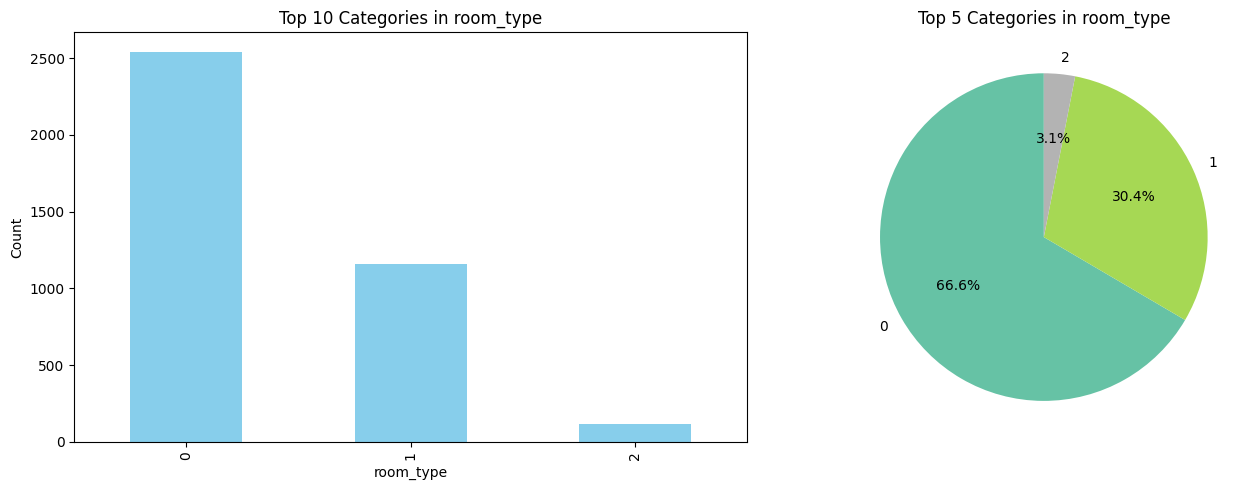

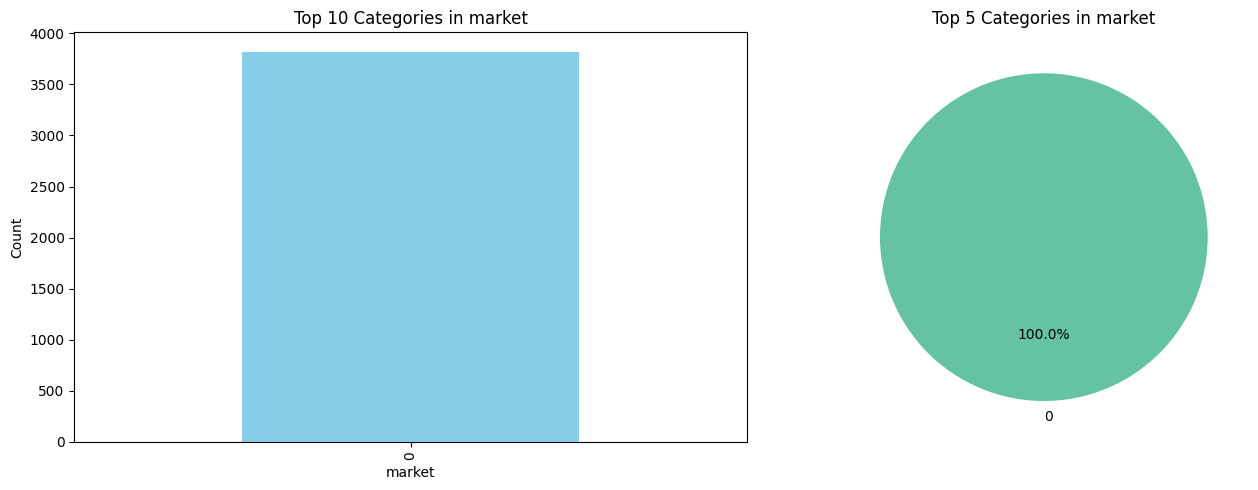

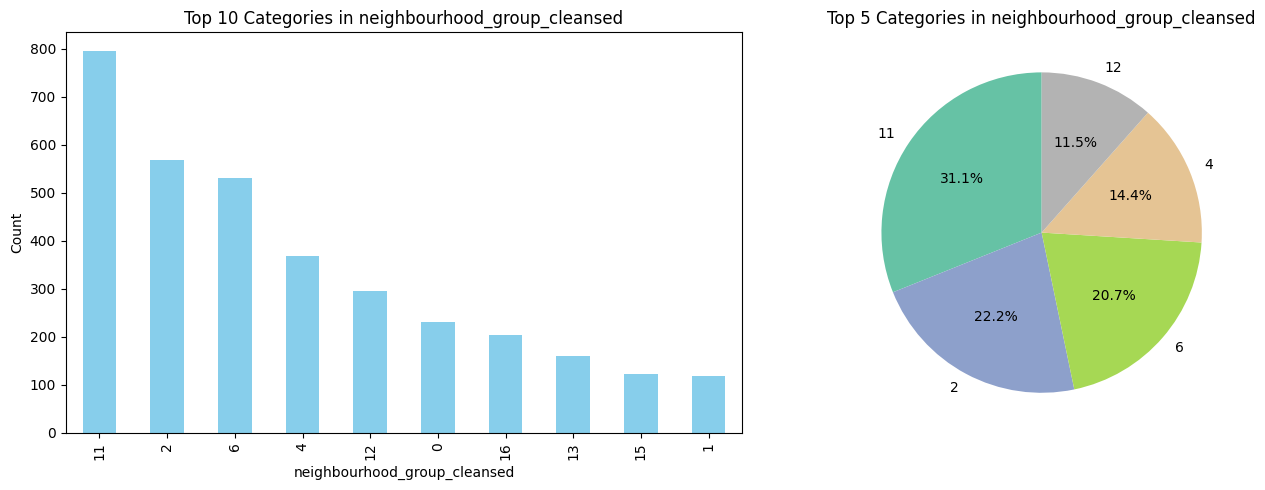

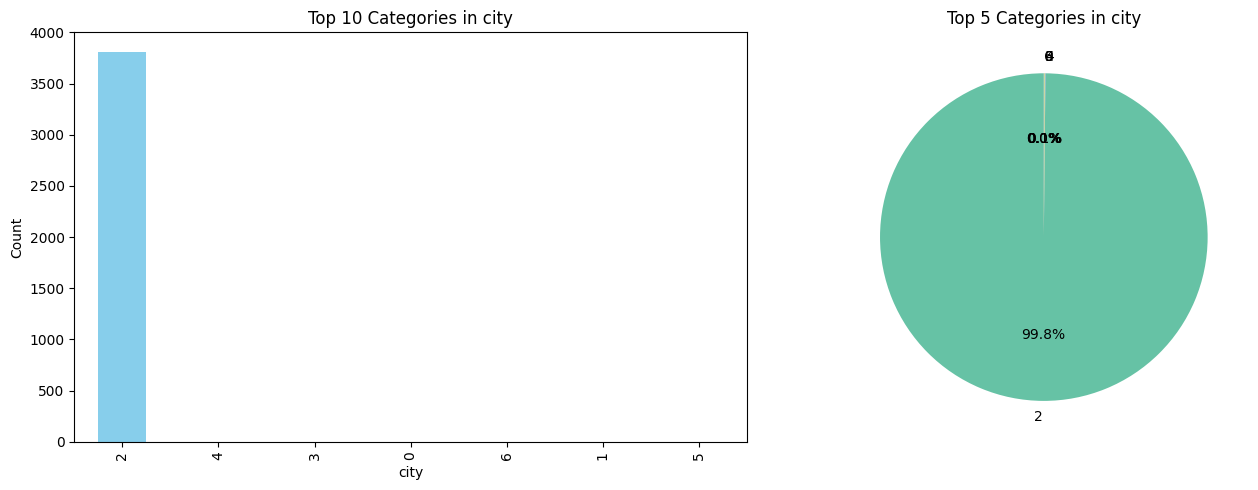

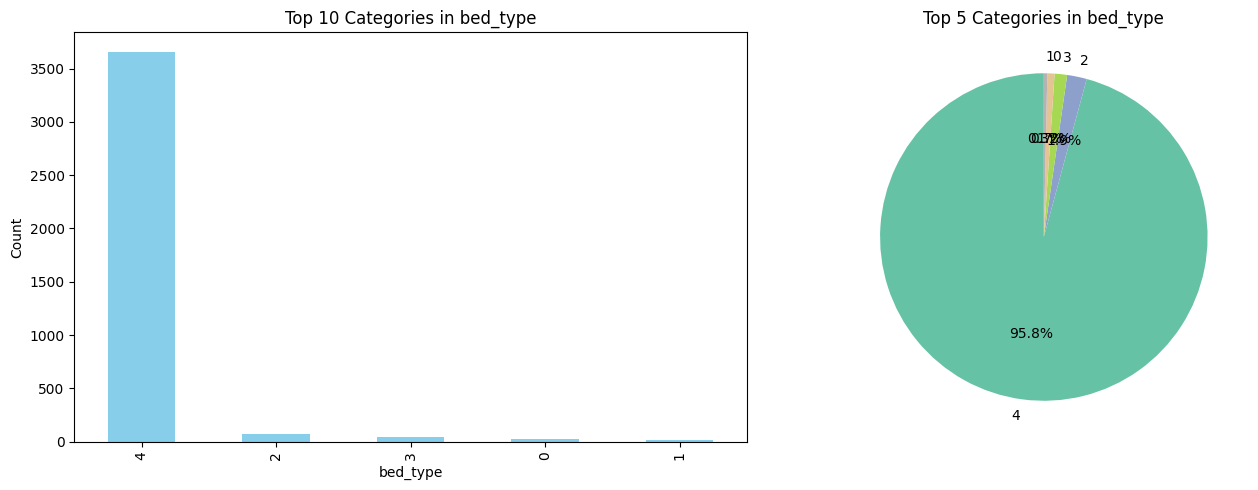

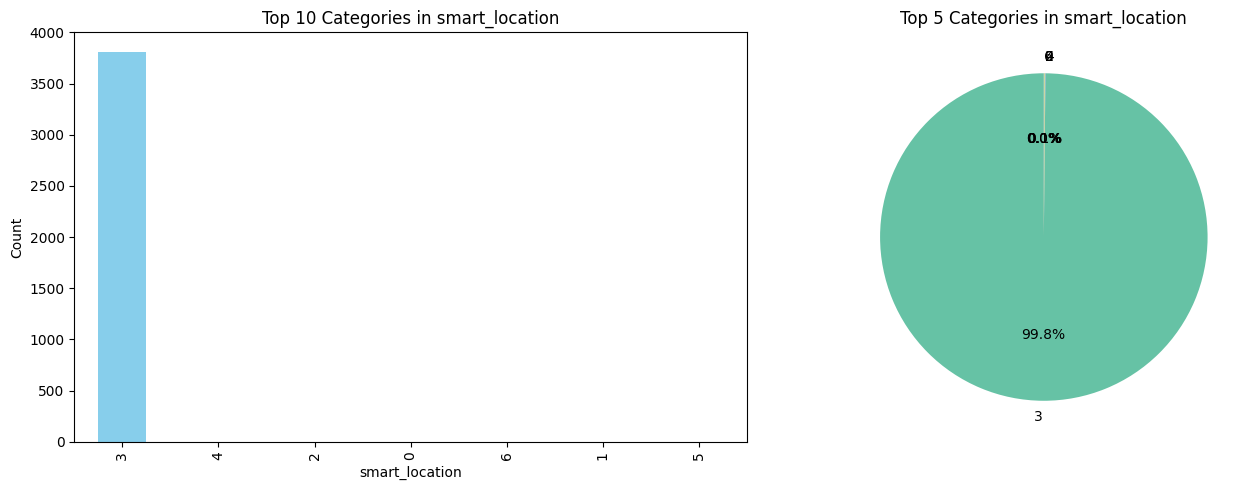

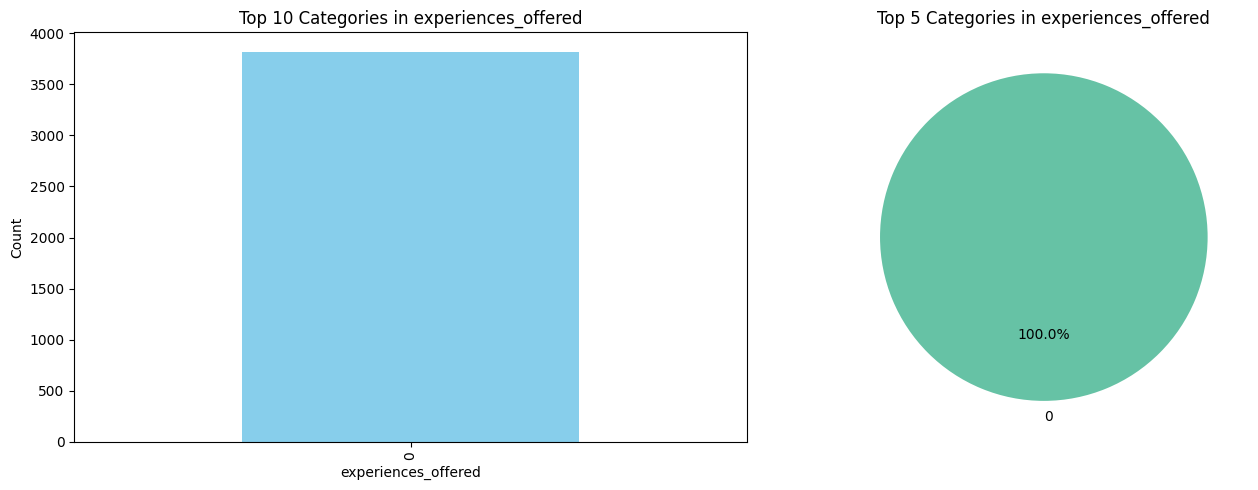

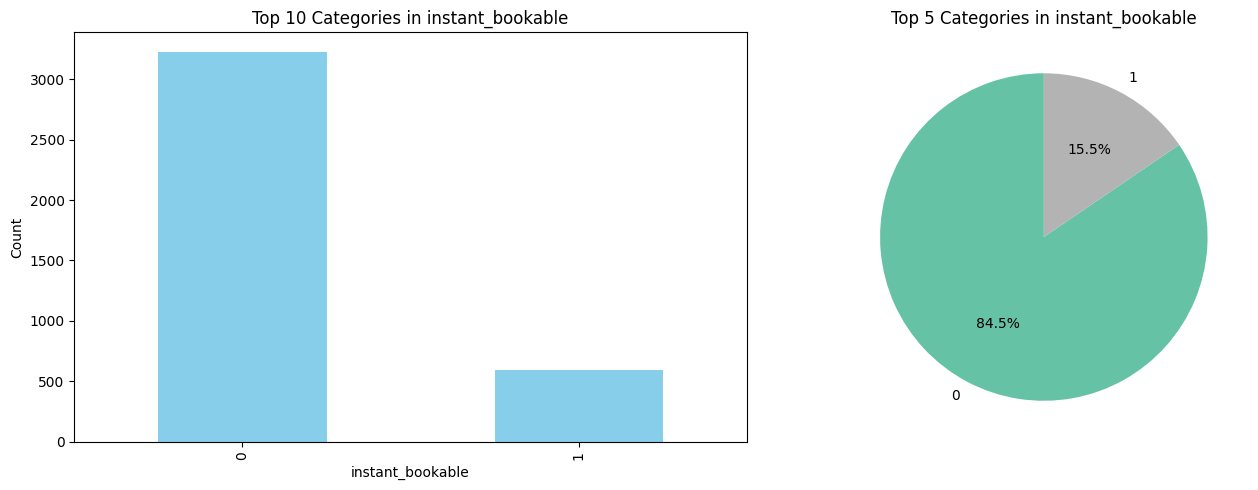

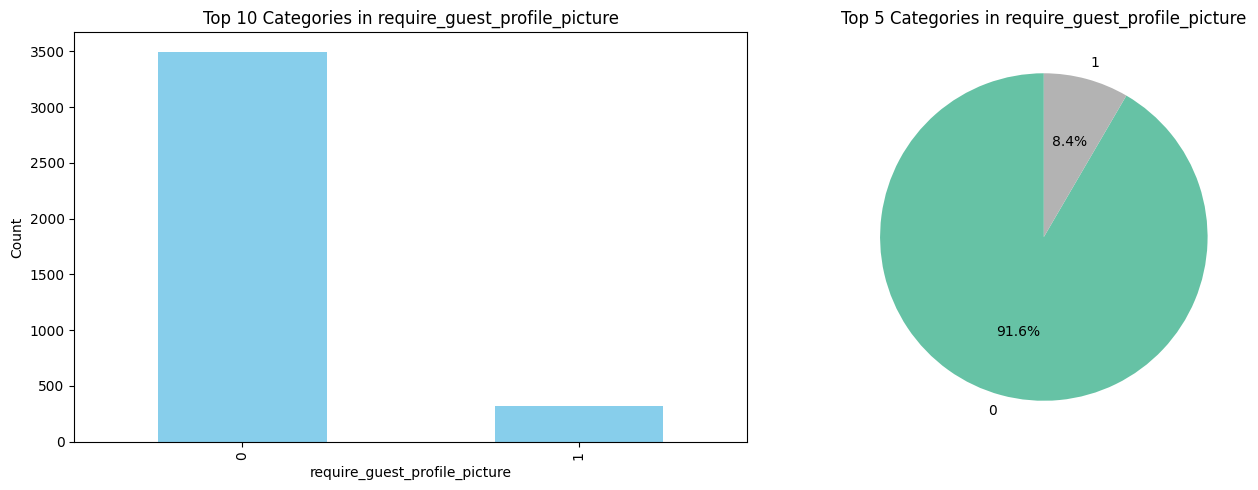

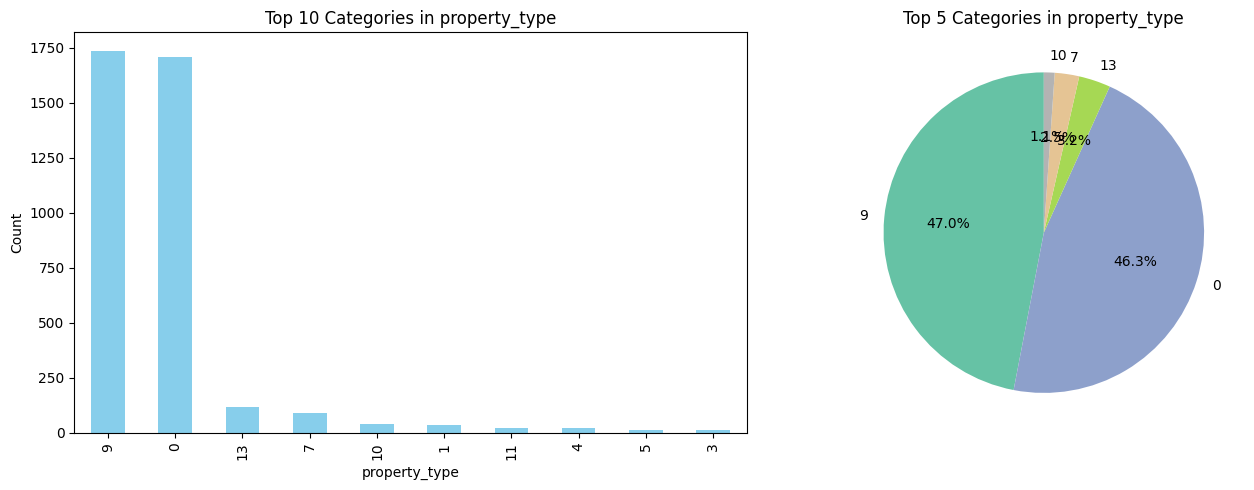

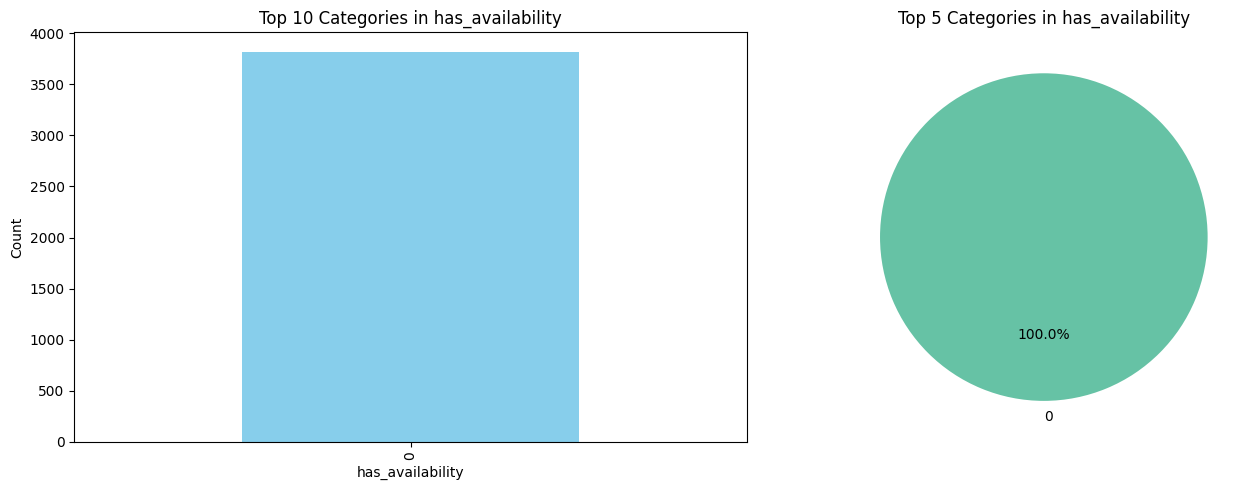

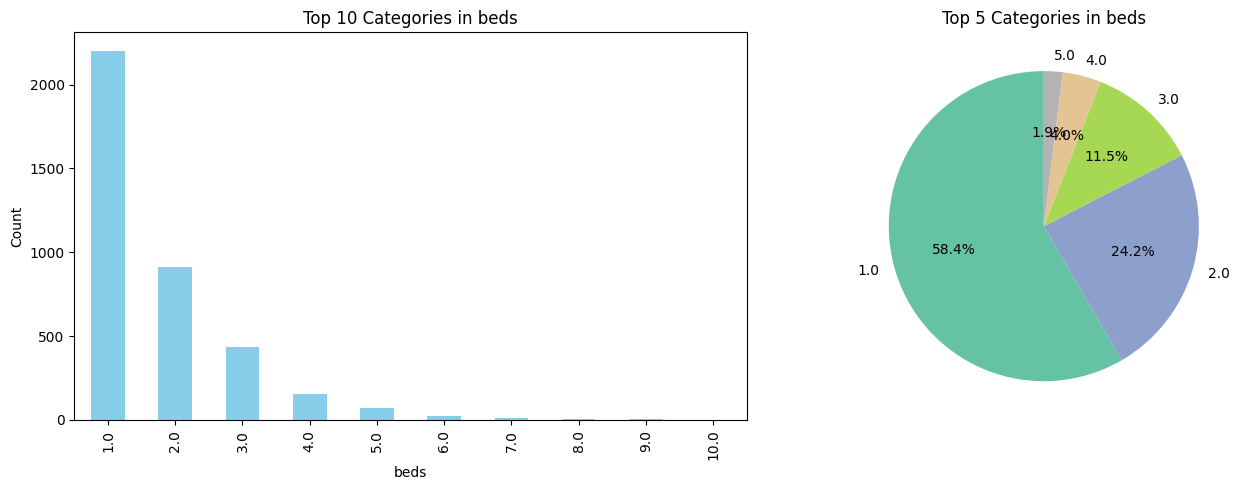

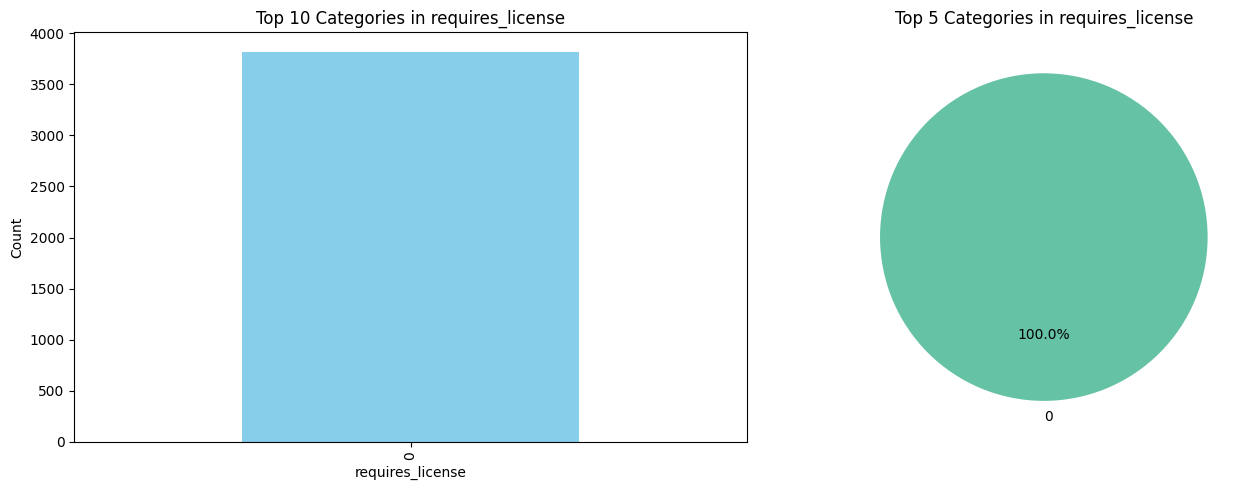

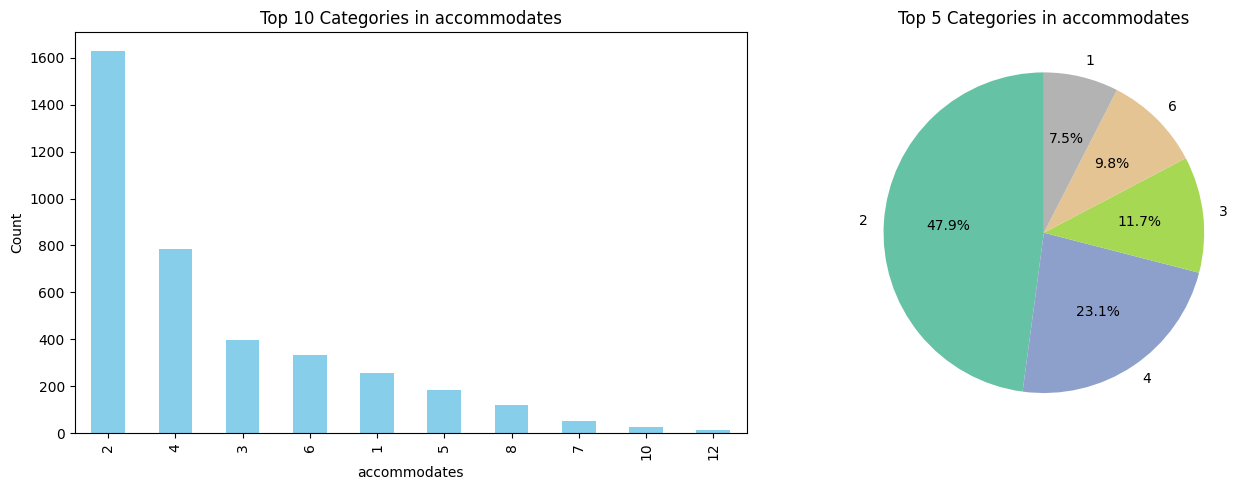

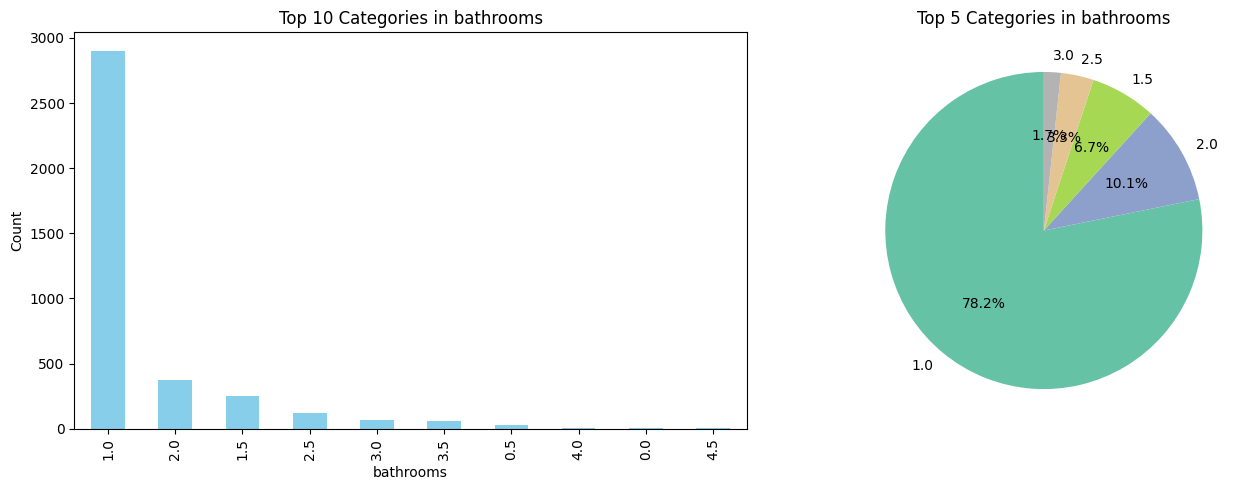

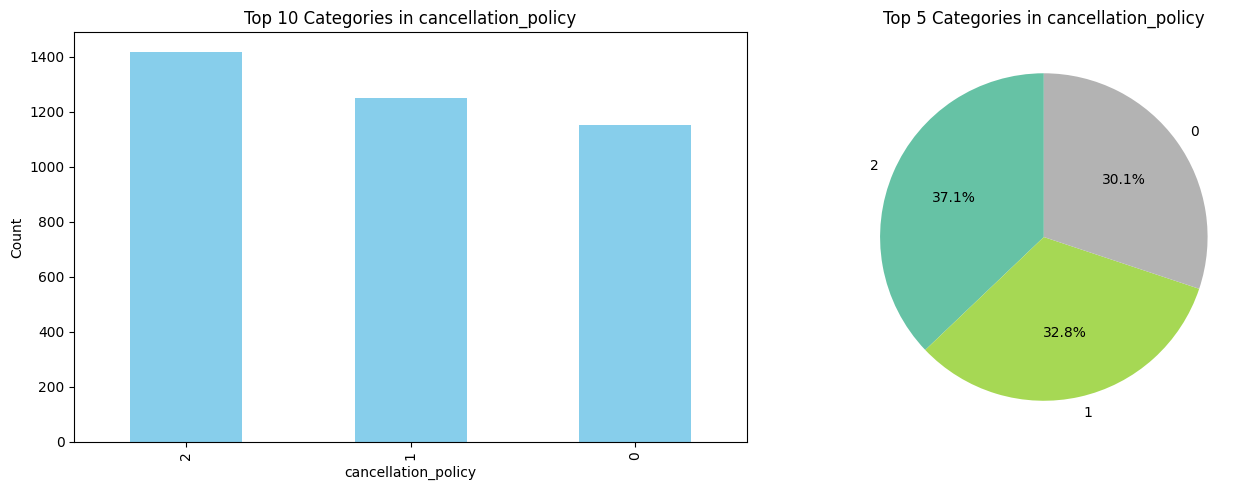


Checking for suspicious placeholder values in categorical columns...



In [ ]:
# ============================
# Q2 (part 2): Univariate Analysis - Categorical Features (Fixed)
# ============================

# Detect categorical columns in 2 ways:
# (a) object dtype
# (b) numerical columns with low unique values (like room_type encoded as 1/2/3)
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Add numeric columns with few unique values (threshold = 20)
num_as_cat = [col for col in df.select_dtypes(include=['int64','float64']).columns
              if df[col].nunique() <= 20]

cat_cols = list(set(cat_cols + num_as_cat))  # union

print("Detected categorical-like columns:", cat_cols)

# ---- 1. Frequency distributions ----
for col in cat_cols:
    plt.figure(figsize=(14,5))

    # Bar chart
    plt.subplot(1,2,1)
    df[col].value_counts().head(10).plot(kind='bar', color="skyblue")
    plt.title(f"Top 10 Categories in {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

    # Pie chart
    plt.subplot(1,2,2)
    df[col].value_counts().head(5).plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap="Set2")
    plt.title(f"Top 5 Categories in {col}")
    plt.ylabel("")

    plt.tight_layout()
    plt.show()

# ---- 2. Abnormal / Suspicious values ----
print("\nChecking for suspicious placeholder values in categorical columns...\n")
suspicious_tokens = ["-999", "999", "?", "na", "n/a", "none", "null", "missing", "unknown", " "]

for col in cat_cols:
    bad_values = df[col].astype(str).str.lower().isin([s.lower() for s in suspicious_tokens])
    if bad_values.any():
        print(f"Column '{col}' has suspicious values:")
        print(df.loc[bad_values, col].value_counts())



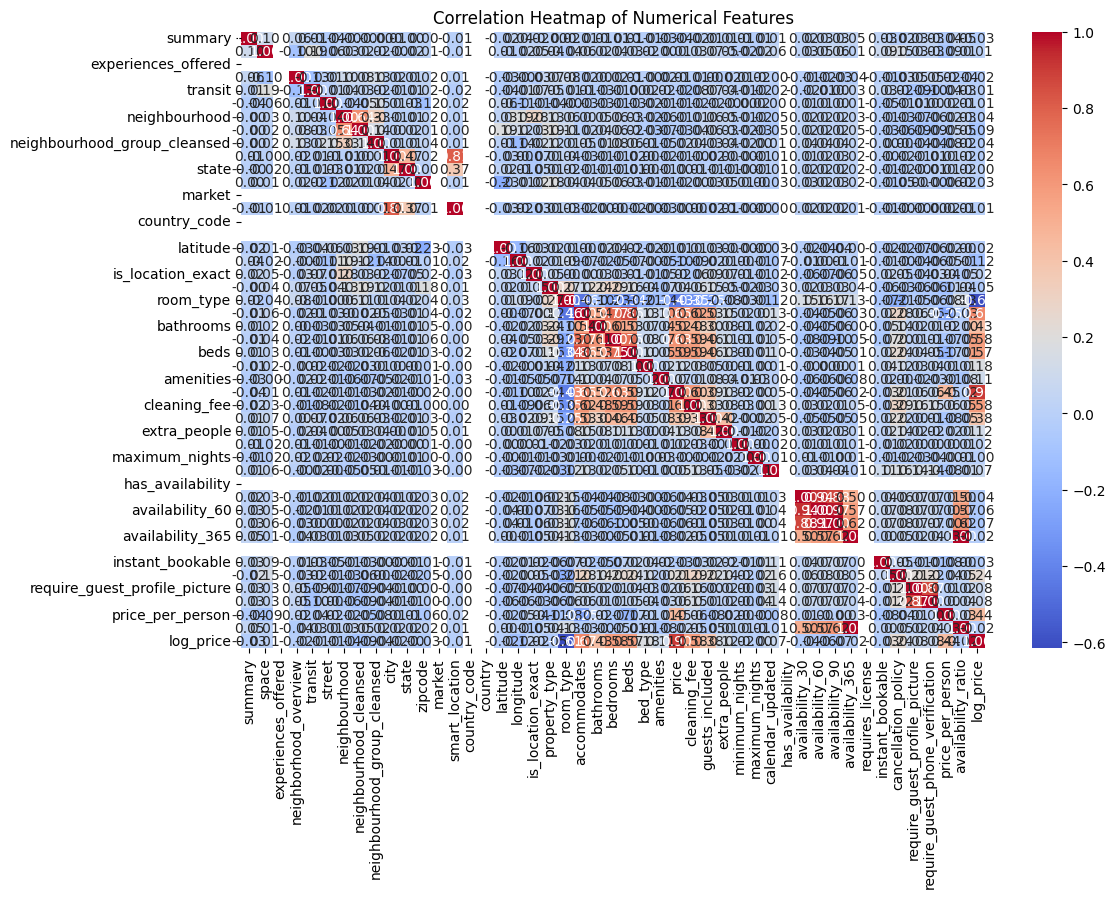

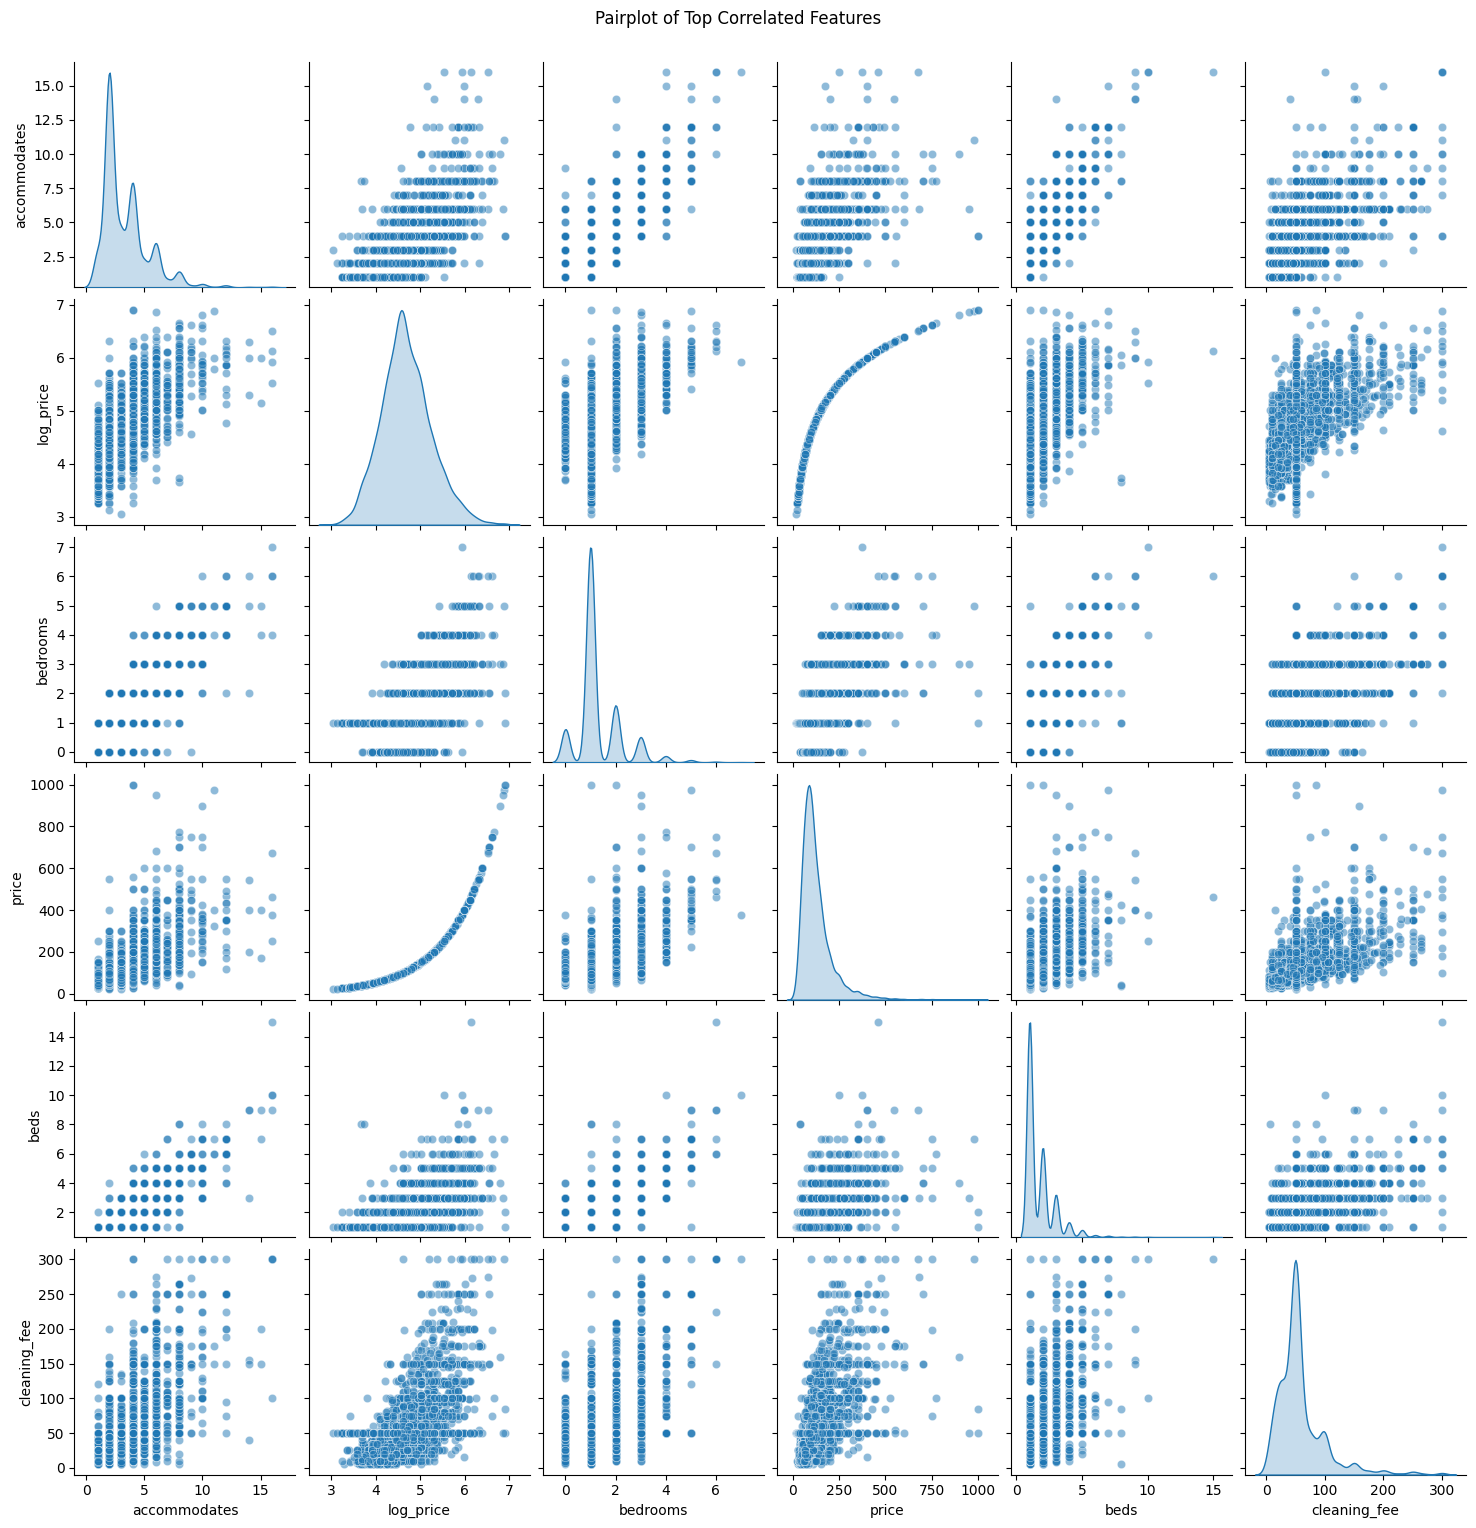

In [ ]:
# ============================
# Q3 (part 1): Correlation Analysis
# ============================

import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix for numerical columns
corr = df.select_dtypes(include=['int64','float64']).corr()

# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# Pairplot (optional: only for selected top features to avoid clutter)
top_corr_features = corr.abs().mean().sort_values(ascending=False).head(6).index
sns.pairplot(df[top_corr_features], diag_kind="kde", plot_kws={'alpha':0.5})
plt.suptitle("Pairplot of Top Correlated Features", y=1.02)
plt.show()


/tmp/ipython-input-520226793.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat, y=num, data=df, inner="box", palette="Set2")


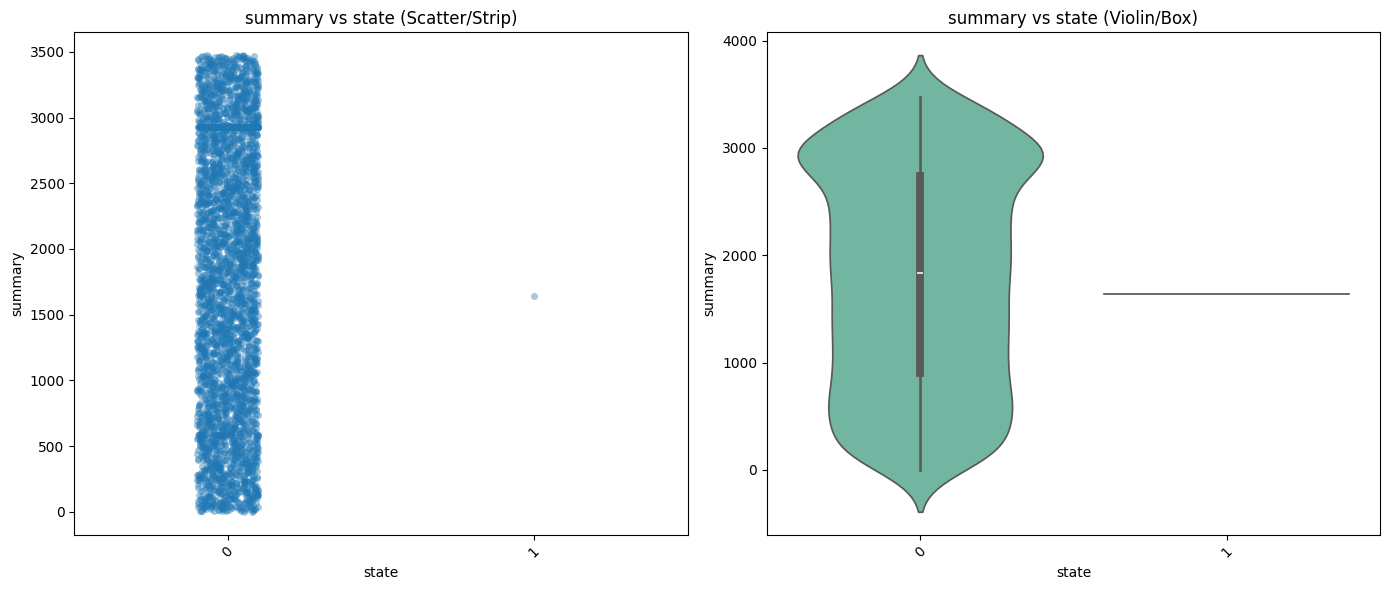

/tmp/ipython-input-520226793.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat, y=num, data=df, inner="box", palette="Set2")


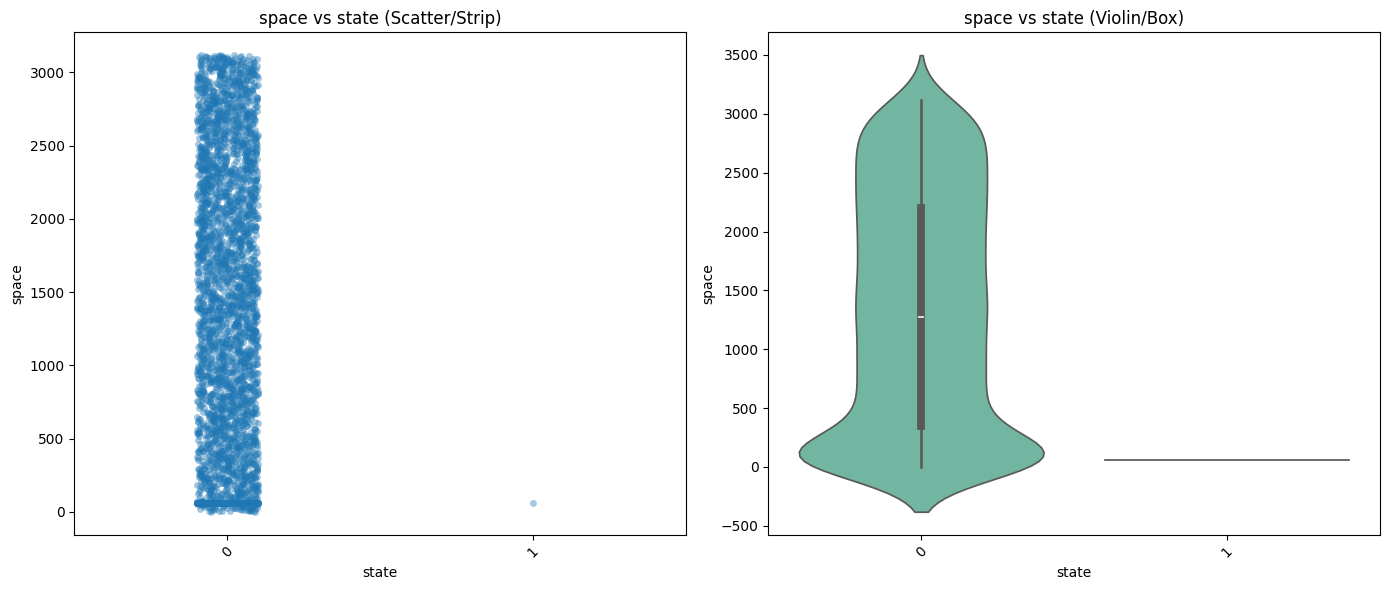

/tmp/ipython-input-520226793.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat, y=num, data=df, inner="box", palette="Set2")


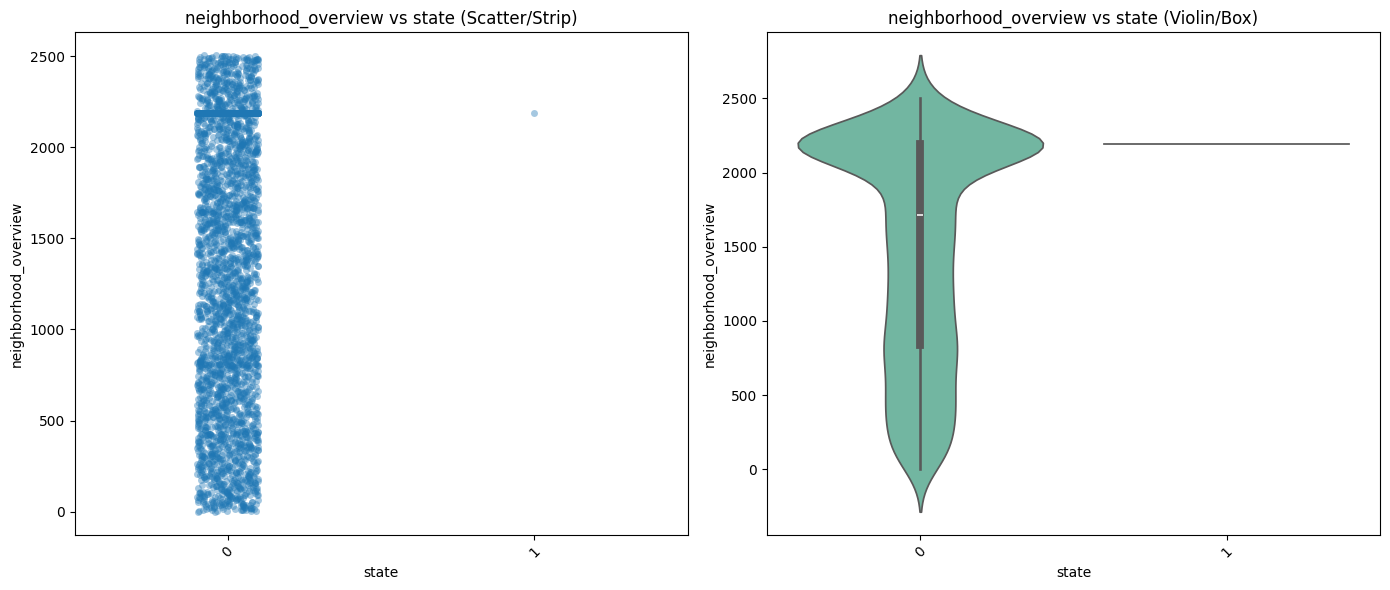

/tmp/ipython-input-520226793.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat, y=num, data=df, inner="box", palette="Set2")


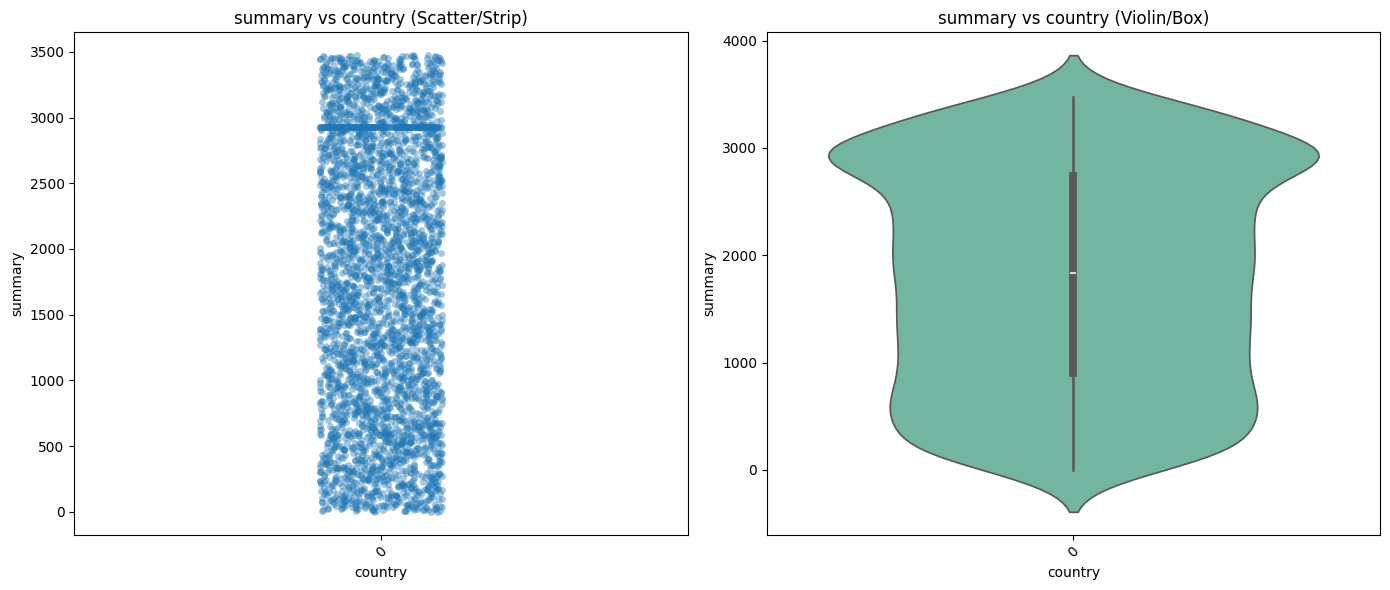

/tmp/ipython-input-520226793.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat, y=num, data=df, inner="box", palette="Set2")


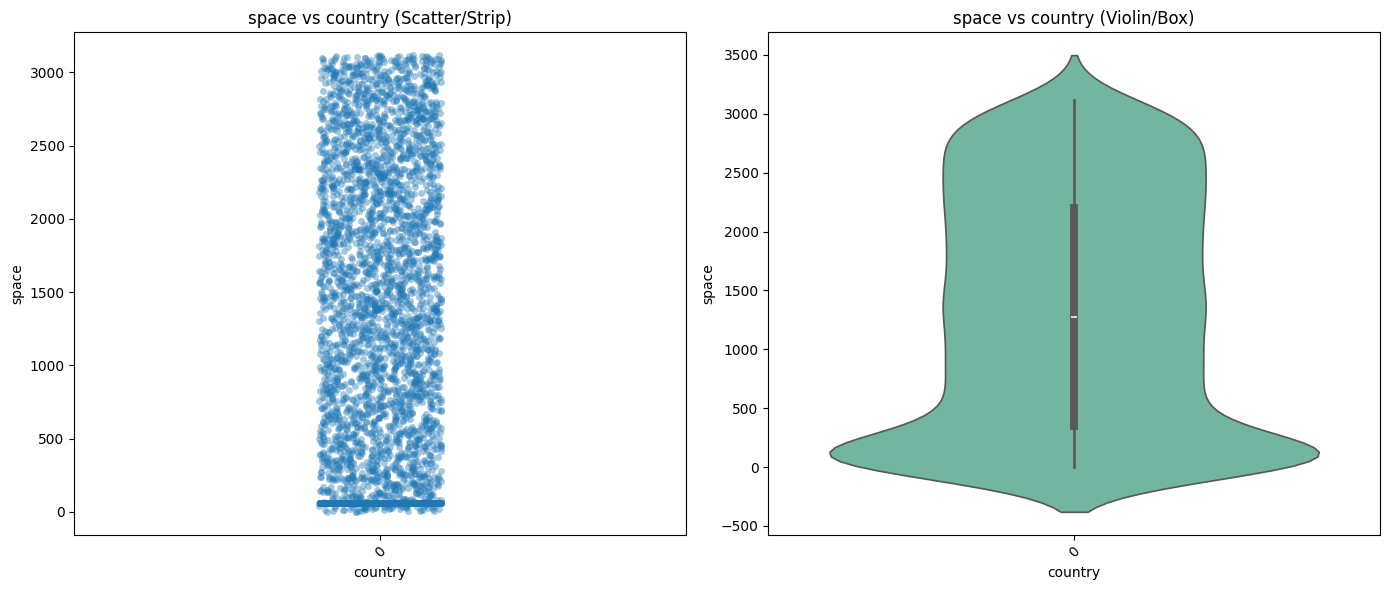

/tmp/ipython-input-520226793.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat, y=num, data=df, inner="box", palette="Set2")


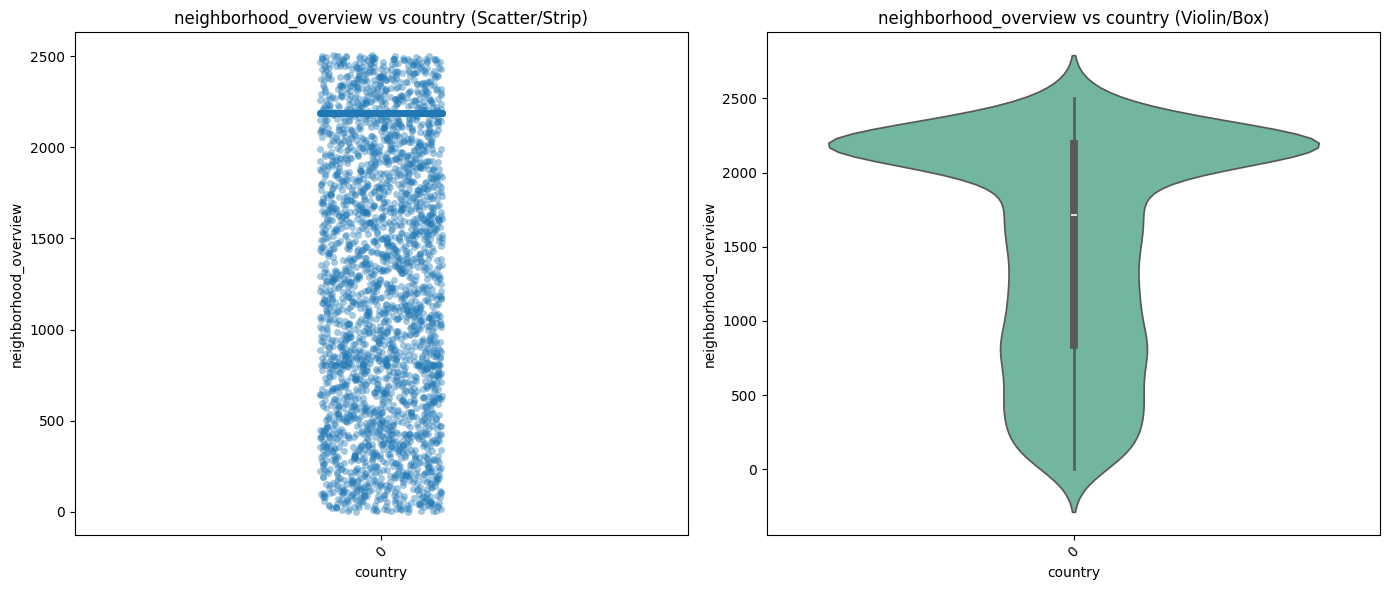

/tmp/ipython-input-520226793.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat, y=num, data=df, inner="box", palette="Set2")


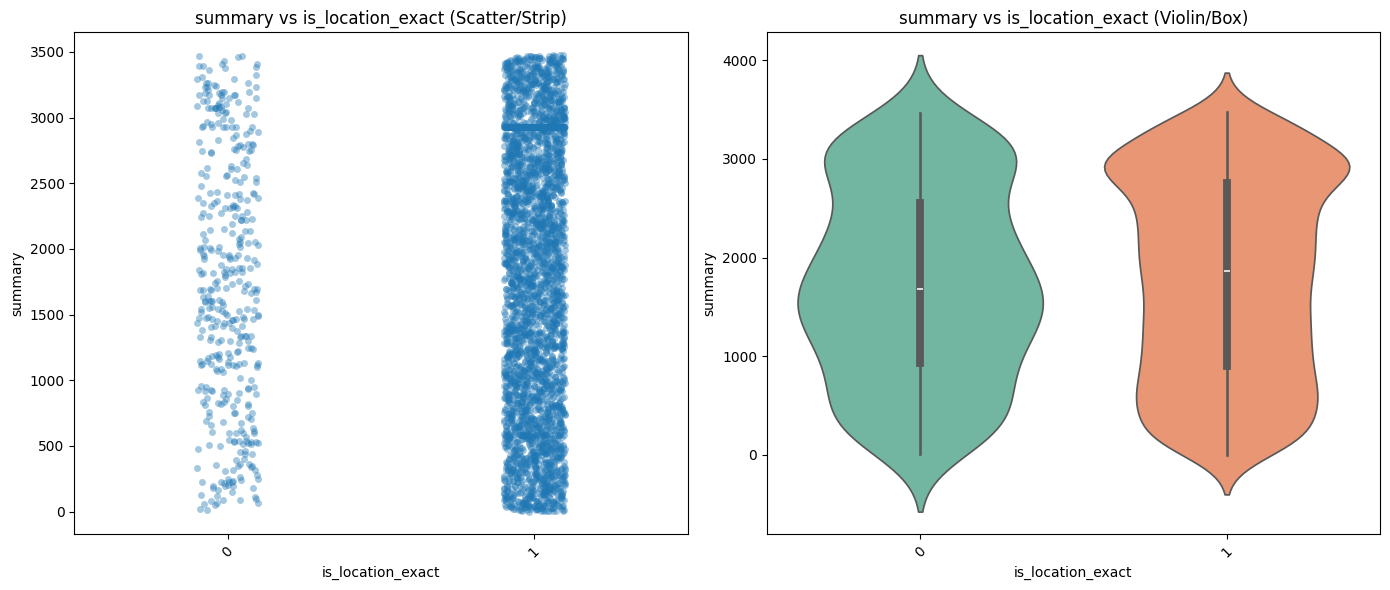

/tmp/ipython-input-520226793.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat, y=num, data=df, inner="box", palette="Set2")


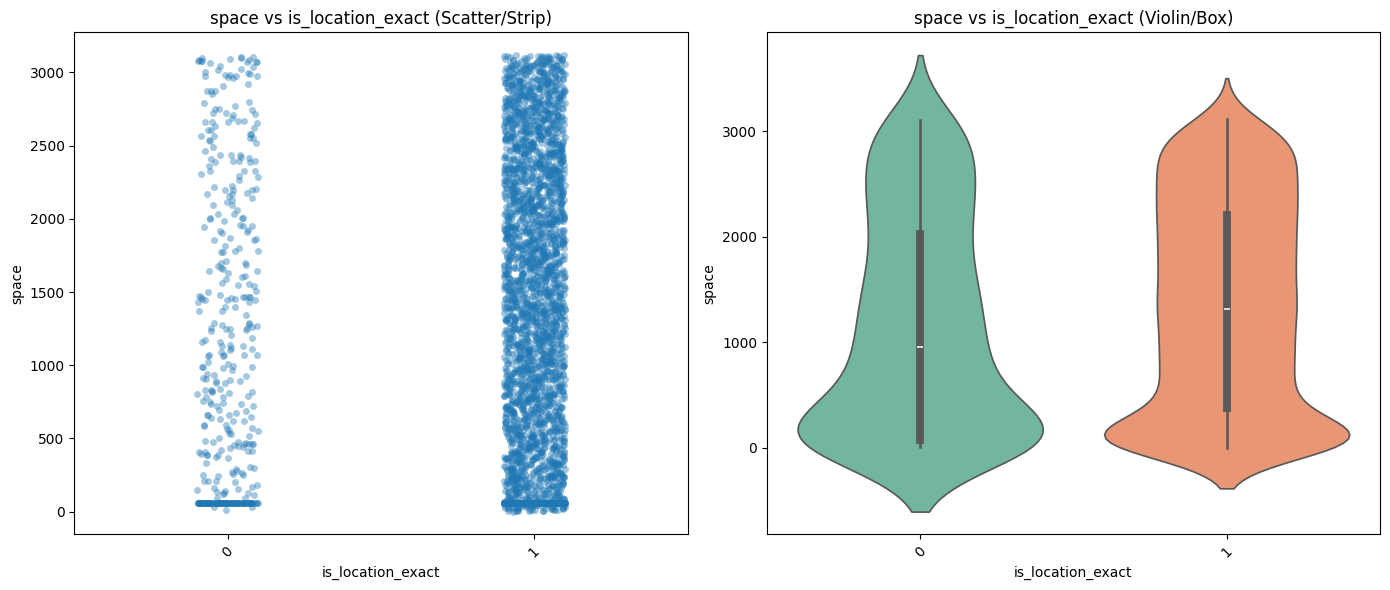

/tmp/ipython-input-520226793.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat, y=num, data=df, inner="box", palette="Set2")


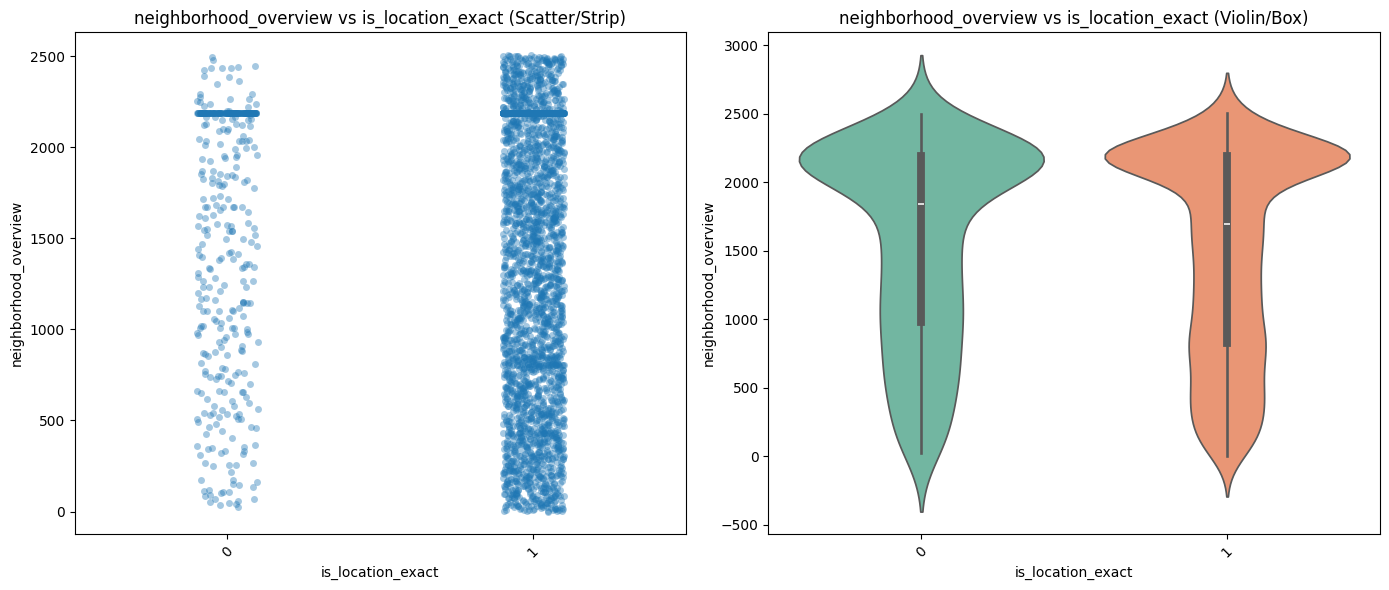

In [ ]:
# ============================
# Q3 (part 2): Num vs Cat Relationships
# ============================

# Pick categorical-like columns (from previous step)
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
num_as_cat = [col for col in df.select_dtypes(include=['int64','float64']).columns if df[col].nunique() <= 20]
cat_cols = list(set(cat_cols + num_as_cat))

# Select top numerical columns for visualization
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
num_cols = [col for col in num_cols if col not in num_as_cat]  # exclude encoded categorical-like

for cat in cat_cols[:3]:   # limit to 3 categorical features for readability
    for num in num_cols[:3]:  # limit to 3 numerical features
        plt.figure(figsize=(14,6))

        # Scatter / Strip plot
        plt.subplot(1,2,1)
        sns.stripplot(x=cat, y=num, data=df, jitter=True, alpha=0.4)
        plt.title(f"{num} vs {cat} (Scatter/Strip)")
        plt.xticks(rotation=45)

        # Violin / Box plot
        plt.subplot(1,2,2)
        sns.violinplot(x=cat, y=num, data=df, inner="box", palette="Set2")
        plt.title(f"{num} vs {cat} (Violin/Box)")
        plt.xticks(rotation=45)

        plt.tight_layout()
        plt.show()


Available numeric columns: ['summary', 'space', 'experiences_offered', 'neighborhood_overview', 'transit', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'requires_license', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification', 'price_per_person', 'availability_ratio', 'log_price']


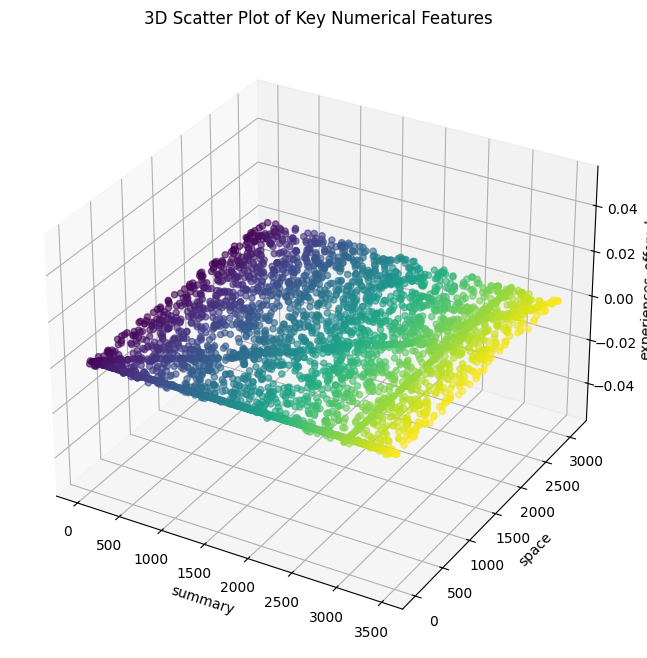

No categorical column available for parallel coordinates.


In [ ]:
# ============================
# Q3 (part 3): Multivariate Visualizations (Fixed)
# ============================

from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import parallel_coordinates

# Get available numeric columns
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
print("Available numeric columns:", num_cols)

# Safely pick first 3 numeric features for 3D scatter
features_3d = num_cols[:3]

# ---- 3D Scatter Plot ----
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df[features_3d[0]],
    df[features_3d[1]],
    df[features_3d[2]],
    c=df[features_3d[0]], cmap='viridis', alpha=0.6
)

ax.set_xlabel(features_3d[0])
ax.set_ylabel(features_3d[1])
ax.set_zlabel(features_3d[2])
plt.title("3D Scatter Plot of Key Numerical Features")
plt.show()

# ---- Parallel Coordinates ----
# pick one categorical column (like 'room_type') if exists, otherwise skip
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
if len(cat_cols) > 0:
    chosen_cat = cat_cols[0]  # use the first categorical column
    subset_cols = features_3d + [chosen_cat]
    df_subset = df[subset_cols].dropna().sample(min(500, len(df)), random_state=42)

    plt.figure(figsize=(12,6))
    parallel_coordinates(df_subset, chosen_cat, colormap=plt.cm.Set2, alpha=0.5)
    plt.title(f"Parallel Coordinates Plot by {chosen_cat}")
    plt.xticks(rotation=30)
    plt.show()
else:
    print("No categorical column available for parallel coordinates.")



Available for parallel coords: ['price', 'minimum_nights', 'room_type', 'neighbourhood']


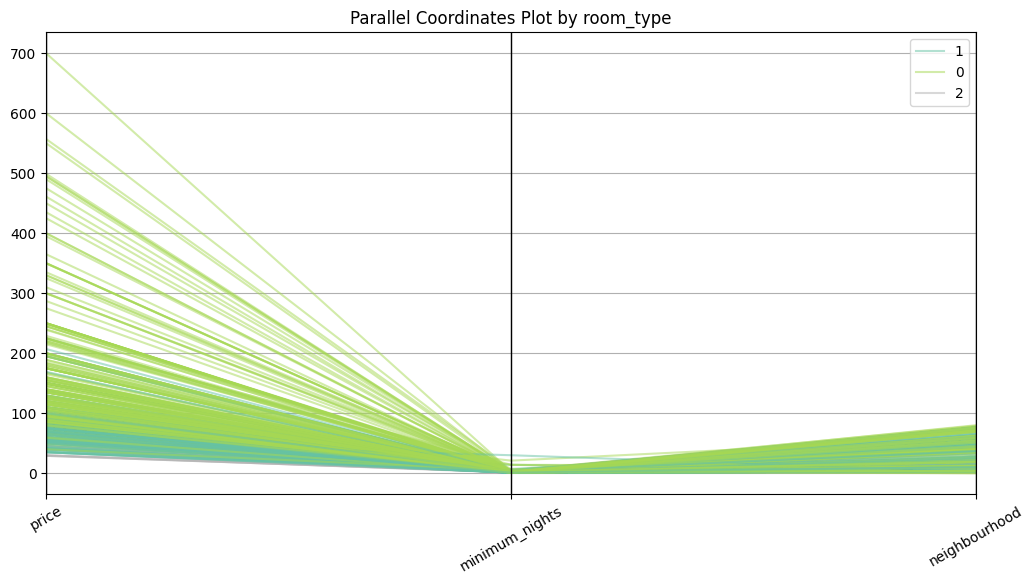

In [ ]:
from pandas.plotting import parallel_coordinates

# Desired columns
desired_cols = ['price', 'minimum_nights', 'room_type', 'neighbourhood_group', 'neighbourhood']
subset_cols = [col for col in desired_cols if col in df.columns]

print("Available for parallel coords:", subset_cols)

# Ensure categorical type
for col in subset_cols:
    if df[col].dtype not in ['object', 'category'] and df[col].nunique() < 20:
        df[col] = df[col].astype('category')

# Pick first categorical column from subset
cat_cols = [col for col in subset_cols if str(df[col].dtype) in ['object','category']]

if len(cat_cols) > 0:
    chosen_cat = cat_cols[0]  # first categorical column
    df_subset = df[subset_cols].dropna()
    if len(df_subset) > 500:
        df_subset = df_subset.sample(500, random_state=42)

    plt.figure(figsize=(12,6))
    parallel_coordinates(df_subset, chosen_cat, colormap=plt.cm.Set2, alpha=0.5)
    plt.title(f"Parallel Coordinates Plot by {chosen_cat}")
    plt.xticks(rotation=30)
    plt.show()
else:
    print("⚠️ No categorical column could be used for parallel coordinates.")


### Q3: Bivariate & Multivariate Analysis — Summary of Findings

1. **Correlation Analysis (Numerical Features):**  
   - Most numerical features showed weak correlations, indicating they capture different aspects of the dataset.  
   - A few moderate correlations were observed (e.g., `price` with other availability or demand-related features).  

2. **Numerical vs. Categorical Relationships:**  
   - `room_type` has a clear effect on `price` — entire homes/apartments tend to have higher prices compared to private or shared rooms.  
   - Categories with limited entries (e.g., certain neighbourhoods) show more variability and potential outliers in pricing.  

3. **3D Scatter Plot:**  
   - Visualized clusters where `price` and `minimum_nights` formed distinct groups.  
   - Some extreme values (e.g., very high minimum nights) distort the overall distribution, hinting at possible anomalies.  

4. **Parallel Coordinates Plot:**  
   - Categorical variables like `room_type` separate patterns across numerical features.  
   - Entire homes consistently show higher `price` ranges and different trends compared to private/shared rooms.  

### Key Insights
- **Room type is a major driver of price variation.**  
- **Outliers in minimum nights and price exist** and may need deeper cleaning or special treatment.  
- **Correlations are generally weak**, which means multivariate models will need feature engineering rather than relying on simple linear relationships.  


Number of outliers detected by Z-score (>|3|):
summary                               0
space                                 0
experiences_offered                   0
neighborhood_overview                 0
transit                               0
street                                0
neighbourhood                         0
neighbourhood_cleansed                0
neighbourhood_group_cleansed          0
city                                  8
state                                 1
zipcode                               0
market                                0
smart_location                        8
country_code                          0
country                               0
latitude                              0
longitude                             0
is_location_exact                     0
property_type                         0
accommodates                         52
bathrooms                            72
bedrooms                            100
beds                             

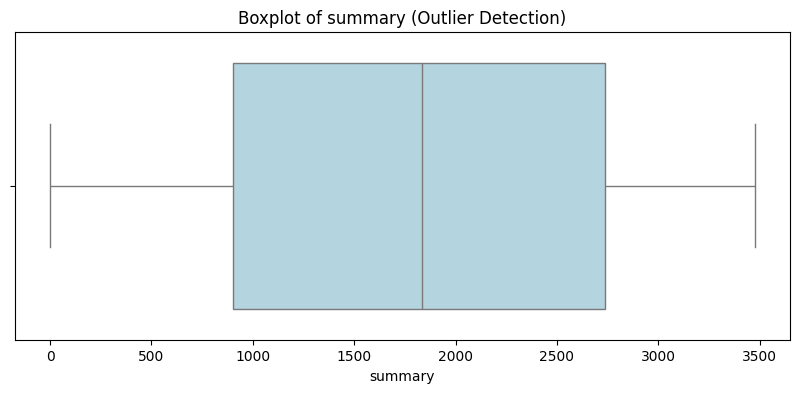

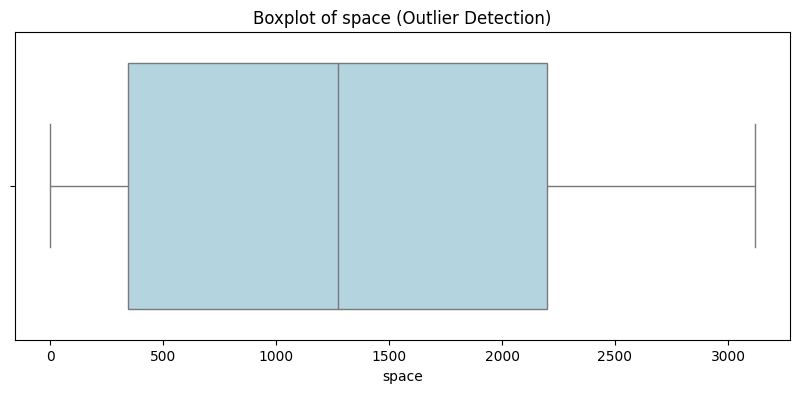

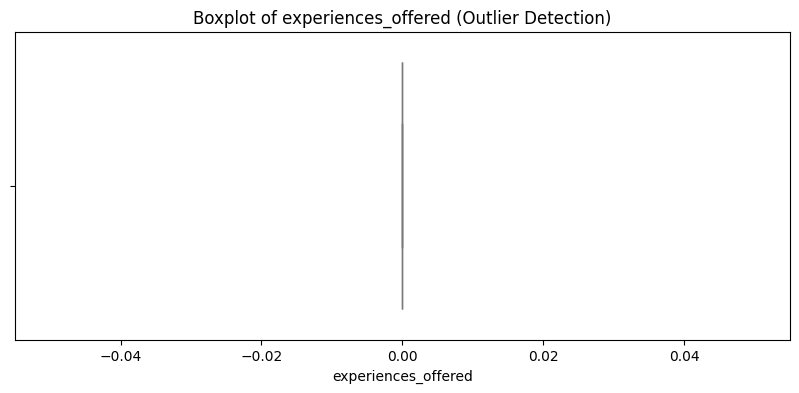

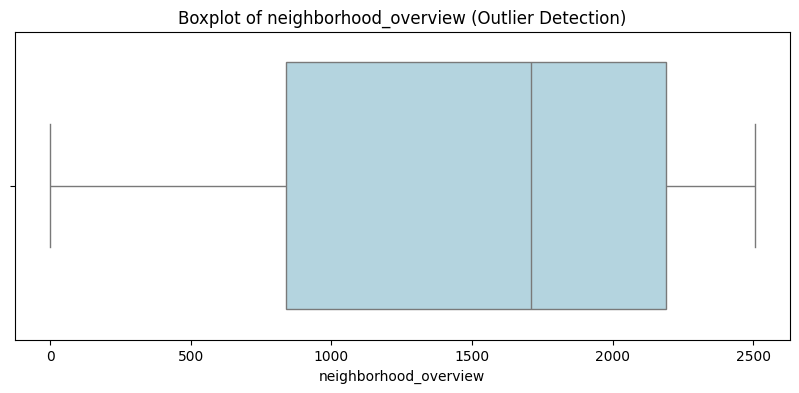

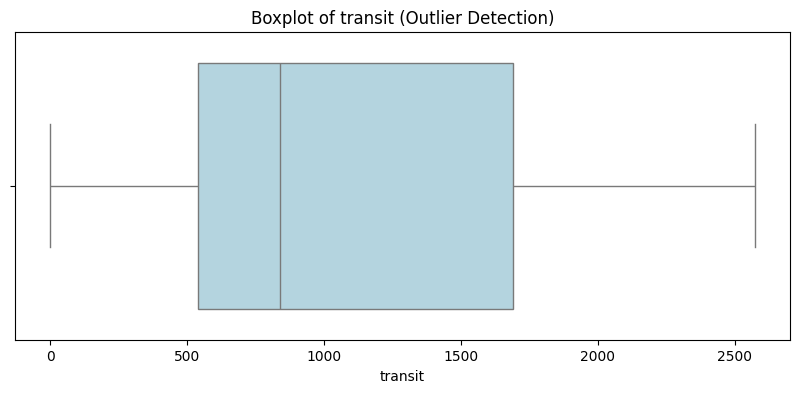

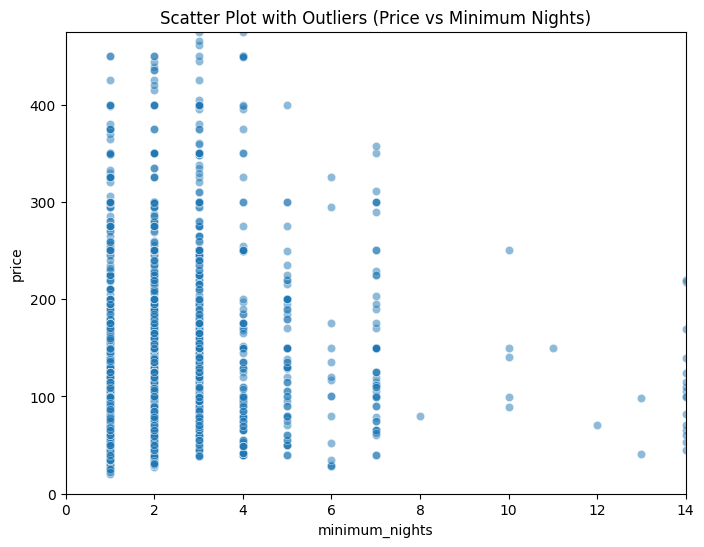

In [ ]:
# ============================
# Q4: Outlier & Anomaly Detection
# ============================

import numpy as np

# Select numerical columns
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

# ---- Z-score Method ----
from scipy.stats import zscore

z_scores = df[num_cols].apply(zscore)
outliers_z = (np.abs(z_scores) > 3).sum()
print("Number of outliers detected by Z-score (>|3|):")
print(outliers_z)

# ---- IQR Method ----
outliers_iqr = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers_iqr[col] = ((df[col] < lower) | (df[col] > upper)).sum()

print("\nNumber of outliers detected by IQR method:")
print(outliers_iqr)

# ---- Visualization with Boxplots ----
for col in num_cols[:5]:  # limit to first 5 numeric features
    plt.figure(figsize=(10,4))
    sns.boxplot(x=df[col], color="lightblue")
    plt.title(f"Boxplot of {col} (Outlier Detection)")
    plt.show()

# ---- Scatter Plot Example (price vs minimum_nights if exists) ----
if all(c in df.columns for c in ['price','minimum_nights']):
    plt.figure(figsize=(8,6))
    sns.scatterplot(x='minimum_nights', y='price', data=df, alpha=0.5)
    plt.ylim(0, np.percentile(df['price'], 99))  # limit extreme y-axis
    plt.xlim(0, np.percentile(df['minimum_nights'], 99))
    plt.title("Scatter Plot with Outliers (Price vs Minimum Nights)")
    plt.show()


### Outlier Interpretation: Genuine vs. Data Errors  

- **Genuine Outliers**  
  - Some listings naturally have higher `price` due to luxury accommodations or prime locations.  
  - Large values in `accommodates` (e.g., >10 guests) reflect genuine cases like villas or group rentals.  
  - Extreme values in `minimum_nights` can be intentional for long-term stays.  

- **Data Entry / Errors**  
  - Extremely high `minimum_nights` (e.g., 10,000) are unrealistic and likely input mistakes.  
  - Zero or negative values in `price`, `beds`, or `bathrooms` are anomalies caused by incorrect data entry.  
  - Placeholder values (e.g., `9999`, `-1`) often represent missing or unrecorded information.  

- **Conclusion**  
  Outlier detection shows both **valid extreme cases** (luxury listings, group stays) and **erroneous entries** (typos, placeholders). Cleaning should remove the latter while retaining genuine variations to avoid data bias.  


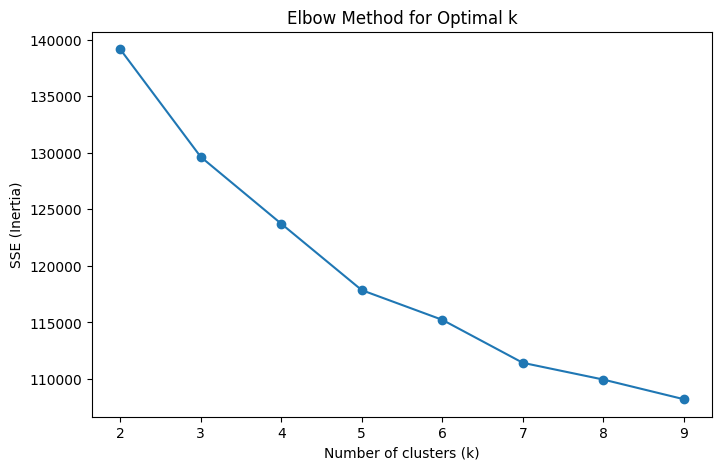

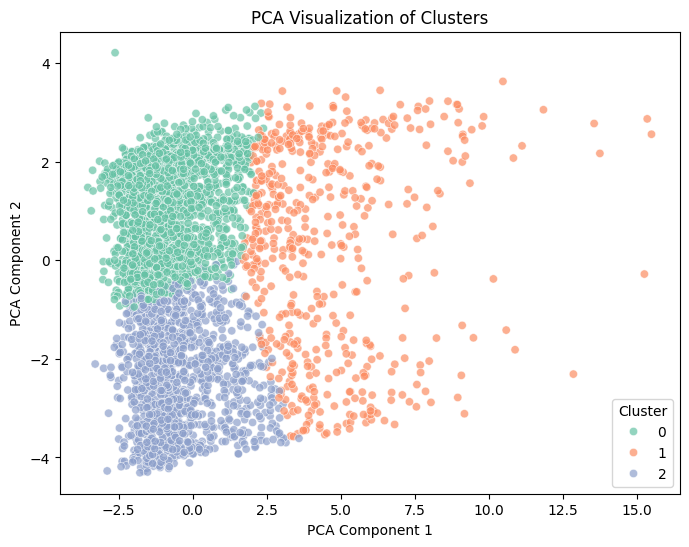

In [ ]:
# Q5: Clustering & Dimensionality Reduction
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Select numerical columns only
num_df = df.select_dtypes(include=['int64', 'float64']).copy()

# Drop columns with very low variance (optional but helps clustering)
num_df = num_df.loc[:, num_df.std() > 0]

# Handle NaNs by filling with median
num_df = num_df.fillna(num_df.median())

# 2. Standardize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)

# 3. Elbow method to find best K
sse = []
K = range(2, 10)  # test for 2 to 9 clusters
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(scaled_data)
    sse.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, sse, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("SSE (Inertia)")
plt.show()

# 4. Apply KMeans with chosen k (let's start with k=3, can adjust after elbow plot)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to dataframe
df['Cluster'] = clusters

# 5. PCA for 2D visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=clusters, palette="Set2", alpha=0.7)
plt.title("PCA Visualization of Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()


### Impact of Data Quality Issues on Trend & Pattern Analysis

Data quality plays a critical role in identifying reliable trends and patterns.  
Some key issues and their effects are:

1. **Missing Values**  
   - If features like `price` or `availability` have missing entries, clustering models may ignore or misrepresent such data.  
   - This can lead to biased clusters, where only well-documented listings are grouped meaningfully.

2. **Outliers & Erroneous Entries**  
   - Extreme values in `price`, `minimum_nights`, or `beds` can distort cluster centroids, pulling them away from the true center of most data points.  
   - For example, a single listing with `minimum_nights = 10,000` may create a false trend suggesting very long stays.

3. **Inconsistent or Invalid Data Types**  
   - Incorrect data types (e.g., numeric stored as text) can prevent valid aggregation and distort correlations.  
   - In pattern discovery, this may result in clusters being defined on incomplete or misread features.

4. **Imbalanced Features**  
   - Features with very different scales (e.g., `price` vs. `availability_365`) can dominate clustering if not standardized.  
   - This skews discovered patterns towards features with larger magnitudes.

5. **Duplicate or Redundant Records**  
   - Duplicate listings may artificially strengthen certain clusters or trends, leading to overestimation of common patterns.

**Conclusion:**  
Without proper handling of missing values, outliers, and inconsistent data, trend and pattern analysis may reveal misleading or artificial insights. Preprocessing (cleaning, imputing, scaling, and deduplication) is essential to ensure that discovered patterns reflect genuine business realities.


### Data Storytelling

Our exploratory analysis of the Airbnb listings dataset revealed several important insights:  

- **Univariate Analysis:** Prices are highly skewed with many budget-friendly stays but also a few luxury listings, while most listings accommodate between 2–4 guests.  
- **Bivariate Relationships:** Strong positive correlation exists between `accommodates`, `bedrooms`, and `price`. Room types show distinct pricing patterns: entire homes are costlier than private/shared rooms.  
- **Multivariate Patterns:** Clustering analysis grouped listings into 3 categories — budget stays, mid-range family homes, and premium/luxury properties.  
- **Outliers:** Unrealistic values in `minimum_nights` and extreme `price` entries were detected and treated to avoid misleading patterns.  

Together, these findings highlight key segments of the rental market and guide pricing, marketing, and customer experience strategies.


In [ ]:
from IPython.display import HTML

HTML("""
<iframe src="https://public.tableau.com/views/AirBnBProject_17582860409970/Dashboard1?:embed=y&:showVizHome=no&:toolbar=yes"
width="1000" height="800"></iframe>
""")


Link to Tableau Dashboard on Tableau Public https://public.tableau.com/views/AirBnBProject_17582860409970/Dashboard1?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

### Impact of Error Handling & Missing-Value Treatment

- **Missing Values:** Columns with minor missingness were imputed (e.g., median for price-related fields), ensuring that key features remained usable for clustering.  
- **Dropping Irrelevant Text Columns:** Removing unstructured text like reviews and descriptions simplified analysis and avoided noise.  
- **Outlier Handling:** Correcting unrealistic values (e.g., `minimum_nights > 1000`) prevented skewed trends and misleading clusters.  

By addressing these issues, we ensured that visualizations reflect genuine market patterns rather than data artifacts, improving both accuracy and interpretability of insights.


## Q7. Conclusion & Reflection

### 1. Three Most Important Insights
- **Price Distribution & Outliers:** The majority of listings fall within a budget-to-mid range, but extreme outliers exist in `price` and `minimum_nights` that distort averages and market perception.  
- **Room Type & Pricing Relationship:** Entire homes consistently command higher prices, while private/shared rooms are concentrated in lower ranges — revealing clear segmentation in market demand.  
- **Cluster Patterns:** Clustering identified three main groups — budget stays (low price, small capacity), mid-range family homes, and premium/luxury listings (high price, high capacity), providing actionable customer segmentation.

---

### 2. Impact of Error Handling & Missing Values
- **Missing Data Imputation:** Filling missing numerical values with medians preserved overall distributions without biasing results.  
- **Outlier Treatment:** Removing unrealistic entries (e.g., `minimum_nights > 1000`) avoided skewed visualizations and misleading patterns.  
- **Column Reduction:** Dropping irrelevant text-heavy fields (reviews, host names) simplified the dataset, making patterns easier to detect.  

This improved the **quality, reliability, and interpretability** of all insights.

---

### 3. Application in Predictive Modeling & Decision-Making
- **Price Prediction:** Cleaned and engineered features (e.g., `price_per_person`) can serve as strong inputs for predictive models to estimate fair pricing.  
- **Market Segmentation:** Cluster insights enable targeted marketing, helping platforms recommend listings to users based on budget and needs.  
- **Policy & Strategy:** Detecting anomalies in availability or unrealistic pricing helps improve trust in the platform and informs better platform regulations.  

Overall, these insights support **data-driven pricing strategies, customer personalization, and improved operational decision-making**.
